In [3]:
!pip3 install -U ucimlrepo pandas==2.2.2 numpy scipy scikit-learn jupyter-server==1.16.0 ydata-profiling[notebook] seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of jupyterlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jupyterlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of jupyterlab-server to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still look

In [4]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*80)
print("DIABETES 130-US HOSPITALS DATASET - EXPLORATORY DATA ANALYSIS")
print("="*80)

DIABETES 130-US HOSPITALS DATASET - EXPLORATORY DATA ANALYSIS


# 1. DATASET INTRODUCTION & LOADING


In [5]:
diabetes_dataset = fetch_ucirepo(id=296)
X_df = diabetes_dataset.data.features
y_df = diabetes_dataset.data.targets

print(f"Dataset Info:")
print(f"- Features shape: {X_df.shape}")
print(f"- Target shape: {y_df.shape}")
print(f"- Total samples: {len(X_df)}")

Dataset Info:
- Features shape: (101766, 47)
- Target shape: (101766, 1)
- Total samples: 101766


In [6]:
# Combine features and targets for easier analysis
df = pd.concat([X_df, y_df], axis=1)
print(f"- Combined dataset shape: {df.shape}")

- Combined dataset shape: (101766, 48)


In [7]:
# Basic dataset information
print(f"\nDataset Overview:")
print(f"- Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"- Data types:\n{df.dtypes.value_counts()}")


Dataset Overview:
- Memory usage: 188.01 MB
- Data types:
object    37
int64     11
Name: count, dtype: int64


# 2. INITIAL DATA EXPLORATION

In [8]:
print("Column Names and Types:")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes)):
    print(f"{i+1:2d}. {col:<25} | {str(dtype):<10}")

Column Names and Types:
 1. race                      | object    
 2. gender                    | object    
 3. age                       | object    
 4. weight                    | object    
 5. admission_type_id         | int64     
 6. discharge_disposition_id  | int64     
 7. admission_source_id       | int64     
 8. time_in_hospital          | int64     
 9. payer_code                | object    
10. medical_specialty         | object    
11. num_lab_procedures        | int64     
12. num_procedures            | int64     
13. num_medications           | int64     
14. number_outpatient         | int64     
15. number_emergency          | int64     
16. number_inpatient          | int64     
17. diag_1                    | object    
18. diag_2                    | object    
19. diag_3                    | object    
20. number_diagnoses          | int64     
21. max_glu_serum             | object    
22. A1Cresult                 | object    
23. metformin                 

In [9]:
print(f"\nFirst 5 rows:")
print(df.head())


First 5 rows:
              race  gender      age weight  admission_type_id  \
0        Caucasian  Female   [0-10)    NaN                  6   
1        Caucasian  Female  [10-20)    NaN                  1   
2  AfricanAmerican  Female  [20-30)    NaN                  1   
3        Caucasian    Male  [30-40)    NaN                  1   
4        Caucasian    Male  [40-50)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

          medical_specialty  ...  citoglipton  insulin  glyburide-metformin  \
0  Pediatrics-Endocrinology 

In [10]:
print(f"\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  i

# 3. DATA PREPROCESSING

In [11]:
# 3.1 Missing Values Analysis
print("3.1 Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Percentage', ascending=False)

print(f"Columns with missing values:")
missing_cols = missing_df[missing_df['Missing Count'] > 0]
print(missing_cols.head(10))

3.1 Missing Values Analysis:
Columns with missing values:
                   Missing Count  Missing Percentage
weight                     98569           96.858479
max_glu_serum              96420           94.746772
A1Cresult                  84748           83.277322
medical_specialty          49949           49.082208
payer_code                 40256           39.557416
race                        2273            2.233555
diag_3                      1423            1.398306
diag_2                       358            0.351787
diag_1                        21            0.020636


In [12]:
# 3.2 Handle Missing Values and Special Characters
print(f"\n3.2 Data Cleaning:")

# Check for '?' values (common in this dataset)
print("Checking for '?' values in categorical columns...")
question_mark_counts = {}
for col in df.select_dtypes(include=['object']).columns:
    if '?' in df[col].values:
        print(f"  {col} has '?' values")
        question_mark_counts[col] = (df[col] == '?').sum()

if question_mark_counts:
    print("Columns with '?' values:")
    for col, count in question_mark_counts.items():
        print(f"  {col}: {count} ({count/len(df)*100:.2f}%)")

# Replace '?' with NaN for better handling
for col in question_mark_counts.keys():
    df[col] = df[col].replace('?', np.nan)


3.2 Data Cleaning:
Checking for '?' values in categorical columns...


In [13]:
# 3.3 Data Type Corrections
print(f"\n3.3 Data Type Corrections:")

# Convert numeric columns that might be stored as objects
numeric_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            # Try to convert to numeric
            pd.to_numeric(df[col], errors='raise')
            numeric_cols.append(col)
        except:
            pass

if numeric_cols:
    print(f"Converting to numeric: {numeric_cols}")
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert text columns to categorical
for c in ['diag_1', 'diag_2', 'diag_3']:
  df[c] = df[c].astype('category')


3.3 Data Type Corrections:


In [14]:
# 3.4 Constant Variables
print(f"\n3.4 Constant Variables:")
constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)

if constant_cols:
    print(f"Columns with constant values: {constant_cols}")


3.4 Constant Variables:
Columns with constant values: ['examide', 'citoglipton']


In [15]:
def map_icd9_to_group(code):
    """Map ICD-9 diagnosis codes to diagnostic groups"""
    if pd.isna(code) or code == '' or str(code).lower() == 'nan':
        return 'Unknown'

    # Convert to string and handle various formats
    code_str = str(code).strip()

    # Remove any trailing decimals like .0
    if '.' in code_str:
        try:
            # Handle decimal codes
            code_num = float(code_str)
        except:
            return 'Other'
    else:
        try:
            # Handle integer codes
            code_num = float(code_str)
        except:
            return 'Other'

    # Apply ICD-9 grouping rules
    if 250.0 <= code_num < 251.0:  # Diabetes: 250.xx
        return 'Diabetes'
    elif (390 <= code_num <= 459) or code_num == 785:  # Circulatory
        return 'Circulatory'
    elif (520 <= code_num <= 579) or code_num == 787:  # Digestive
        return 'Digestive'
    elif (580 <= code_num <= 629) or code_num == 788:  # Genitourinary
        return 'Genitourinary'
    elif 800 <= code_num <= 999:  # Injury
        return 'Injury'
    elif 710 <= code_num <= 739:  # Musculoskeletal
        return 'Musculoskeletal'
    elif 140 <= code_num <= 239:  # Neoplasms
        return 'Neoplasms'
    elif (460 <= code_num <= 519) or code_num == 786:  # Respiratory
        return 'Respiratory'
    else:
        return 'Other'

In [16]:
diag_cols = ['diag_1', 'diag_2', 'diag_3']
for col in diag_cols:
    if col in df.columns:
        group_col = f"{col}_group"
        df[group_col] = df[col].apply(map_icd9_to_group)
        print(f"- Added {group_col} based on ICD-9 mapping")

print(f"\nICD-9 Code Mapping Rules Applied:")
print(f"• Diabetes: 250.xx")
print(f"• Circulatory: 390-459, 785")
print(f"• Respiratory: 460-519, 786")
print(f"• Digestive: 520-579, 787")
print(f"• Genitourinary: 580-629, 788")
print(f"• Injury: 800-999")
print(f"• Musculoskeletal: 710-739")
print(f"• Neoplasms: 140-239")
print(f"• Other: All remaining codes")

- Added diag_1_group based on ICD-9 mapping
- Added diag_2_group based on ICD-9 mapping
- Added diag_3_group based on ICD-9 mapping

ICD-9 Code Mapping Rules Applied:
• Diabetes: 250.xx
• Circulatory: 390-459, 785
• Respiratory: 460-519, 786
• Digestive: 520-579, 787
• Genitourinary: 580-629, 788
• Injury: 800-999
• Musculoskeletal: 710-739
• Neoplasms: 140-239
• Other: All remaining codes


# 4. DESCRIPTIVE STATISTICS

In [17]:
# 4.1 Numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"4.1 Numerical Variables ({len(numerical_cols)} columns):")
print(df[numerical_cols].describe())

4.1 Numerical Variables (11 columns):
       admission_type_id  discharge_disposition_id  admission_source_id  \
count      101766.000000             101766.000000        101766.000000   
mean            2.024006                  3.715642             5.754437   
std             1.445403                  5.280166             4.064081   
min             1.000000                  1.000000             1.000000   
25%             1.000000                  1.000000             1.000000   
50%             1.000000                  1.000000             7.000000   
75%             3.000000                  4.000000             7.000000   
max             8.000000                 28.000000            25.000000   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101766.000000       101766.000000   101766.000000    101766.000000   
mean           4.395987           43.095641        1.339730        16.021844   
std            2.985108           19.674362   

In [18]:
# 4.2 Categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\n4.2 Categorical Variables ({len(categorical_cols)} columns):")
for col in categorical_cols[:10]:  # Show first 10 categorical columns
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
    if unique_vals <= 10:
        print(f"  Values: {df[col].value_counts().head().to_dict()}")


4.2 Categorical Variables (37 columns):
race: 5 unique values
  Values: {'Caucasian': 76099, 'AfricanAmerican': 19210, 'Hispanic': 2037, 'Other': 1506, 'Asian': 641}
gender: 3 unique values
  Values: {'Female': 54708, 'Male': 47055, 'Unknown/Invalid': 3}
age: 10 unique values
  Values: {'[70-80)': 26068, '[60-70)': 22483, '[50-60)': 17256, '[80-90)': 17197, '[40-50)': 9685}
weight: 9 unique values
  Values: {'[75-100)': 1336, '[50-75)': 897, '[100-125)': 625, '[125-150)': 145, '[25-50)': 97}
payer_code: 17 unique values
medical_specialty: 72 unique values
max_glu_serum: 3 unique values
  Values: {'Norm': 2597, '>200': 1485, '>300': 1264}
A1Cresult: 3 unique values
  Values: {'>8': 8216, 'Norm': 4990, '>7': 3812}
metformin: 4 unique values
  Values: {'No': 81778, 'Steady': 18346, 'Up': 1067, 'Down': 575}
repaglinide: 4 unique values
  Values: {'No': 100227, 'Steady': 1384, 'Up': 110, 'Down': 45}


# 5. TARGET VARIABLE ANALYSIS

In [19]:
target_col = y_df.columns[0] if len(y_df.columns) > 0 else 'readmitted'
if target_col in df.columns:
    print(f"Target variable: {target_col}")
    print(f"Target distribution:")
    target_counts = df[target_col].value_counts()
    print(target_counts)
    print(f"\nTarget proportions:")
    print(target_counts / len(df) * 100)

Target variable: readmitted
Target distribution:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Target proportions:
readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: count, dtype: float64


# 6. EXPLORATORY DATA ANALYSIS

6.1 Target Variable Distribution:


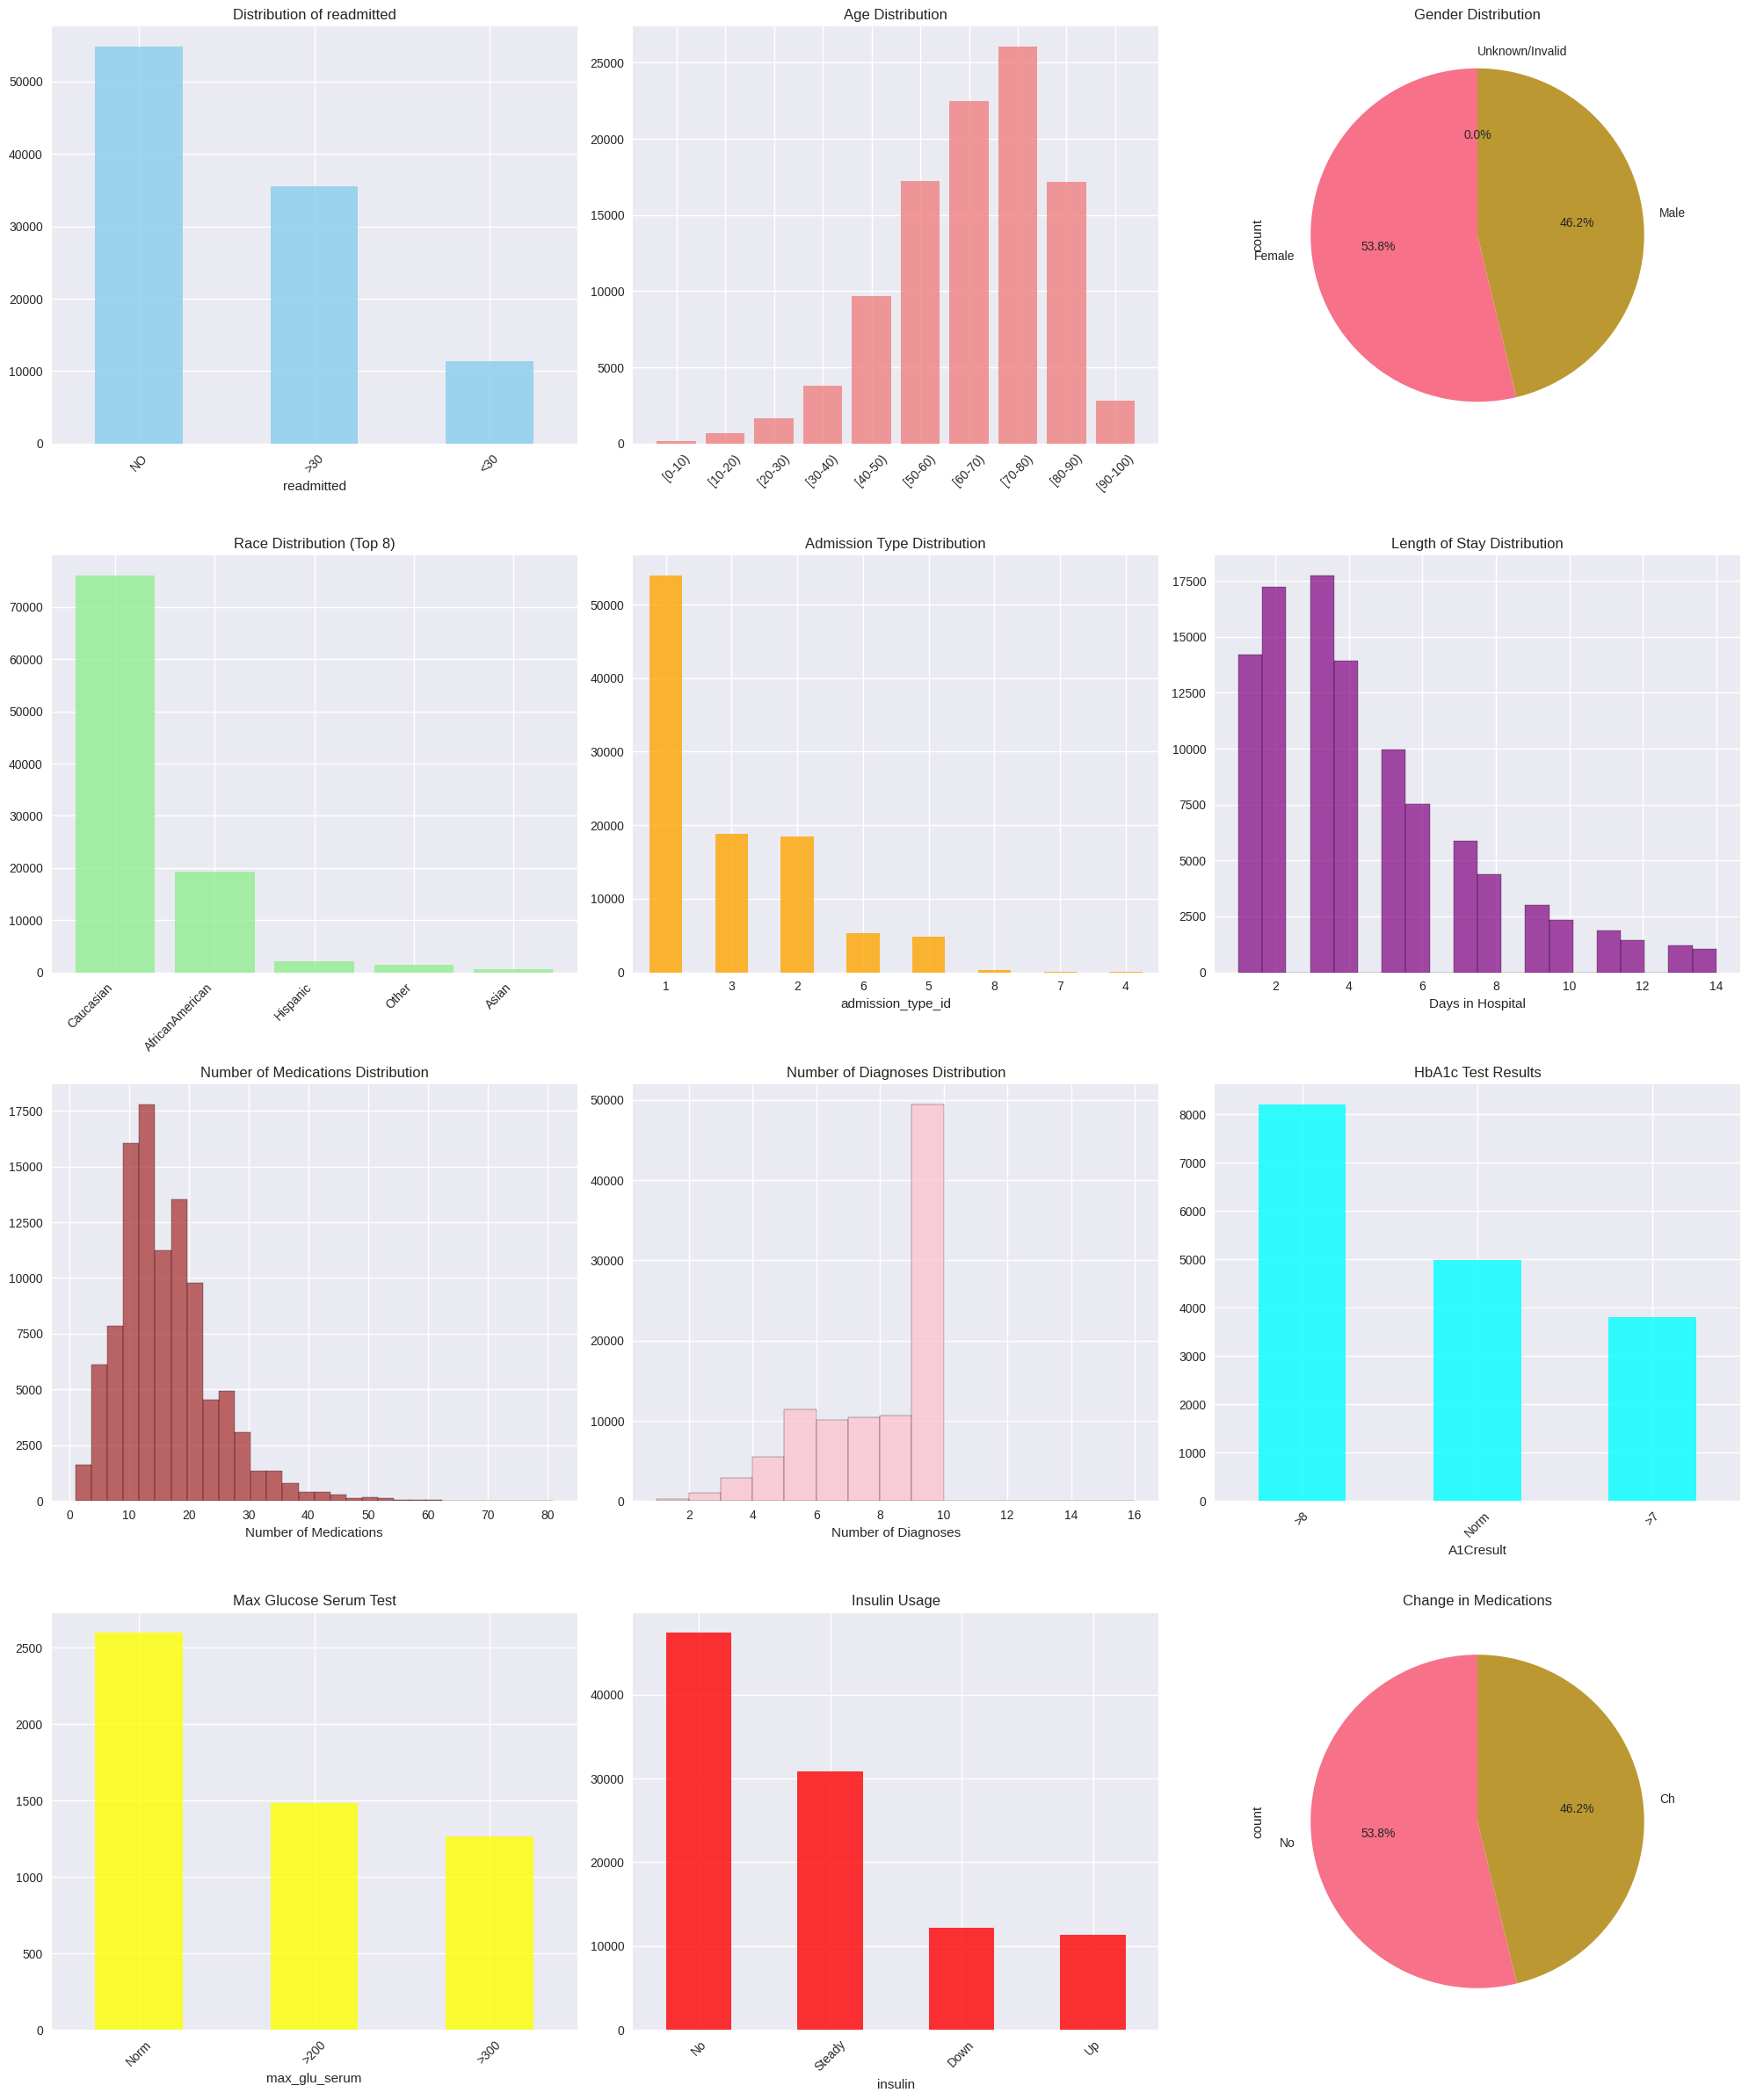

In [20]:
# Create visualizations
fig = plt.figure(figsize=(20, 24))

# 6.1 Target Distribution
print("6.1 Target Variable Distribution:")
plt.subplot(4, 3, 1)
if target_col in df.columns:
    df[target_col].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'Distribution of {target_col}')
    plt.xticks(rotation=45)

# 6.2 Age Distribution
plt.subplot(4, 3, 2)
if 'age' in df.columns:
    age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)',
                 '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
    age_counts = df['age'].value_counts()
    # Reorder if age categories exist
    if any(age in age_counts.index for age in age_order):
        ordered_counts = []
        labels = []
        for age_range in age_order:
            if age_range in age_counts.index:
                ordered_counts.append(age_counts[age_range])
                labels.append(age_range)
        plt.bar(range(len(labels)), ordered_counts, color='lightcoral', alpha=0.8)
        plt.xticks(range(len(labels)), labels, rotation=45)
    else:
        df['age'].value_counts().plot(kind='bar', color='lightcoral', alpha=0.8)
        plt.xticks(rotation=45)
    plt.title('Age Distribution')

# 6.3 Gender Distribution
plt.subplot(4, 3, 3)
if 'gender' in df.columns:
    df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Gender Distribution')

# 6.4 Race Distribution
plt.subplot(4, 3, 4)
if 'race' in df.columns:
    race_counts = df['race'].value_counts().head(8)  # Top 8 races
    plt.bar(range(len(race_counts)), race_counts.values, color='lightgreen', alpha=0.8)
    plt.xticks(range(len(race_counts)), race_counts.index, rotation=45, ha='right')
    plt.title('Race Distribution (Top 8)')

# 6.5 Admission Type
plt.subplot(4, 3, 5)
if 'admission_type_id' in df.columns:
    df['admission_type_id'].value_counts().plot(kind='bar', color='orange', alpha=0.8)
    plt.title('Admission Type Distribution')
    plt.xticks(rotation=0)

# 6.6 Length of Stay
plt.subplot(4, 3, 6)
if 'time_in_hospital' in df.columns:
    plt.hist(df['time_in_hospital'], bins=20, color='purple', alpha=0.7, edgecolor='black')
    plt.title('Length of Stay Distribution')
    plt.xlabel('Days in Hospital')

# 6.7 Number of Medications
plt.subplot(4, 3, 7)
if 'num_medications' in df.columns:
    plt.hist(df['num_medications'], bins=30, color='brown', alpha=0.7, edgecolor='black')
    plt.title('Number of Medications Distribution')
    plt.xlabel('Number of Medications')

# 6.8 Number of Diagnoses
plt.subplot(4, 3, 8)
if 'number_diagnoses' in df.columns:
    plt.hist(df['number_diagnoses'], bins=15, color='pink', alpha=0.7, edgecolor='black')
    plt.title('Number of Diagnoses Distribution')
    plt.xlabel('Number of Diagnoses')

# 6.9 HbA1c Test Results
plt.subplot(4, 3, 9)
if 'A1Cresult' in df.columns:
    df['A1Cresult'].value_counts().plot(kind='bar', color='cyan', alpha=0.8)
    plt.title('HbA1c Test Results')
    plt.xticks(rotation=45)

# 6.10 Glucose Serum Test
plt.subplot(4, 3, 10)
if 'max_glu_serum' in df.columns:
    df['max_glu_serum'].value_counts().plot(kind='bar', color='yellow', alpha=0.8)
    plt.title('Max Glucose Serum Test')
    plt.xticks(rotation=45)

# 6.11 Insulin Usage
plt.subplot(4, 3, 11)
if 'insulin' in df.columns:
    df['insulin'].value_counts().plot(kind='bar', color='red', alpha=0.8)
    plt.title('Insulin Usage')
    plt.xticks(rotation=45)

# 6.12 Change in Medications
plt.subplot(4, 3, 12)
if 'change' in df.columns:
    df['change'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Change in Medications')

plt.tight_layout()
plt.show()

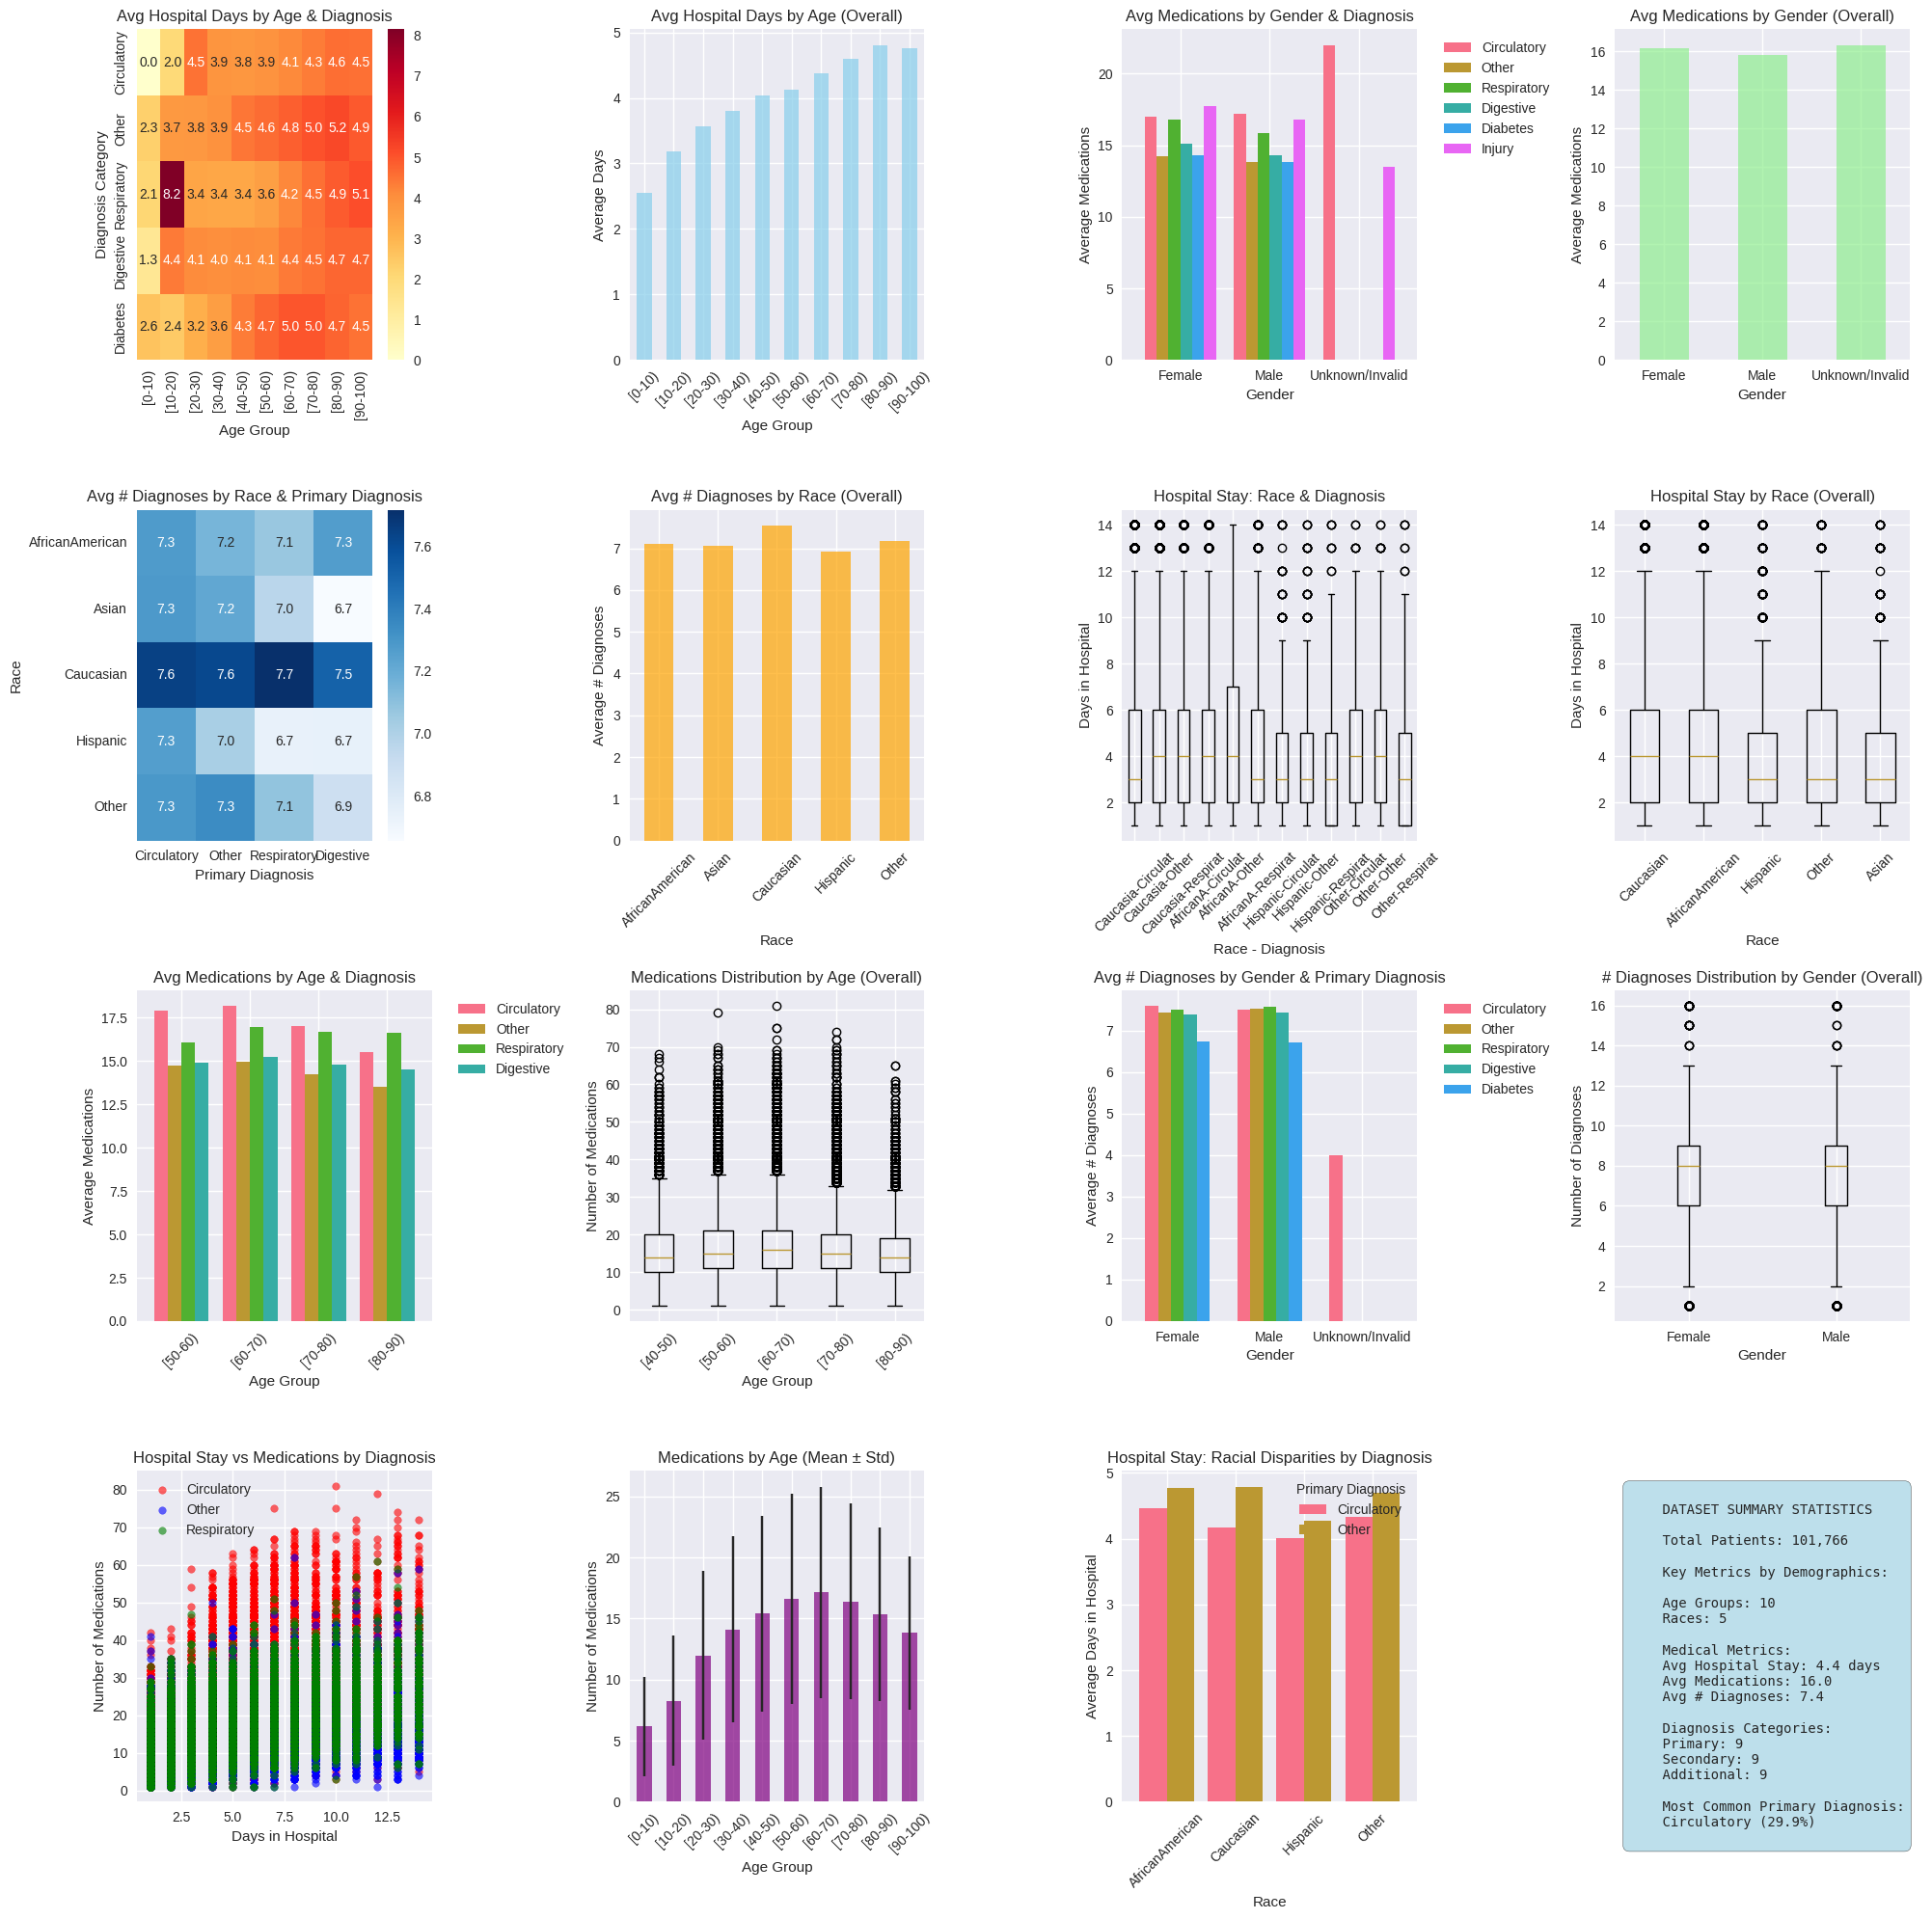

In [21]:
# DEMOGRAPHIC & MEDICAL CHARACTERISTICS BY DIAGNOSIS
if 'diag_1_group' in df.columns:
    # Create comprehensive analysis charts
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))

    # 1. Time in hospital by Age and Diagnosis
    if 'time_in_hospital' in df.columns and 'age' in df.columns:
        ax = axes[0, 0]
        age_hospital_diag = df.pivot_table(values='time_in_hospital',
                                         index='age',
                                         columns='diag_1_group',
                                         aggfunc='mean').fillna(0)

        # Select top 5 diagnoses for clarity
        top_diag = df['diag_1_group'].value_counts().head(5).index
        age_hospital_subset = age_hospital_diag[top_diag]

        sns.heatmap(age_hospital_subset.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax)
        ax.set_title('Avg Hospital Days by Age & Diagnosis')
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Diagnosis Category')

    # 2. Time in hospital by Age (no diagnosis grouping)
    if 'time_in_hospital' in df.columns and 'age' in df.columns:
        ax = axes[0, 1]
        age_hospital = df.groupby('age')['time_in_hospital'].mean()
        age_hospital.plot(kind='bar', ax=ax, color='skyblue', alpha=0.7)
        ax.set_title('Avg Hospital Days by Age (Overall)')
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Average Days')
        ax.tick_params(axis='x', rotation=45)

    # 3. Medications by Gender and Diagnosis
    if 'num_medications' in df.columns and 'gender' in df.columns:
        ax = axes[0, 2]
        gender_med_diag = df.pivot_table(values='num_medications',
                                       index='gender',
                                       columns='diag_1_group',
                                       aggfunc='mean').fillna(0)

        top_diag_meds = df['diag_1_group'].value_counts().head(6).index
        gender_med_subset = gender_med_diag[top_diag_meds]

        gender_med_subset.plot(kind='bar', ax=ax, width=0.8)
        ax.set_title('Avg Medications by Gender & Diagnosis')
        ax.set_xlabel('Gender')
        ax.set_ylabel('Average Medications')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=0)

    # 4. Medications by Gender (no diagnosis grouping)
    if 'num_medications' in df.columns and 'gender' in df.columns:
        ax = axes[0, 3]
        gender_med = df.groupby('gender')['num_medications'].mean()
        gender_med.plot(kind='bar', ax=ax, color='lightgreen', alpha=0.7)
        ax.set_title('Avg Medications by Gender (Overall)')
        ax.set_xlabel('Gender')
        ax.set_ylabel('Average Medications')
        ax.tick_params(axis='x', rotation=0)

    # 5. Number of diagnoses by Race and Primary Diagnosis
    if 'number_diagnoses' in df.columns and 'race' in df.columns:
        ax = axes[1, 0]
        # Focus on top races to avoid overcrowding
        top_races = df['race'].value_counts().head(5).index
        df_race_subset = df[df['race'].isin(top_races)]

        race_numdiag_diag = df_race_subset.pivot_table(values='number_diagnoses',
                                                     index='race',
                                                     columns='diag_1_group',
                                                     aggfunc='mean').fillna(0)

        top_diag_race = df['diag_1_group'].value_counts().head(4).index
        race_numdiag_subset = race_numdiag_diag[top_diag_race]

        sns.heatmap(race_numdiag_subset, annot=True, fmt='.1f', cmap='Blues', ax=ax)
        ax.set_title('Avg # Diagnoses by Race & Primary Diagnosis')
        ax.set_xlabel('Primary Diagnosis')
        ax.set_ylabel('Race')

    # 6. Number of diagnoses by Race (no diagnosis grouping)
    if 'number_diagnoses' in df.columns and 'race' in df.columns:
        ax = axes[1, 1]
        top_races = df['race'].value_counts().head(8).index
        race_numdiag = df[df['race'].isin(top_races)].groupby('race')['number_diagnoses'].mean()
        race_numdiag.plot(kind='bar', ax=ax, color='orange', alpha=0.7)
        ax.set_title('Avg # Diagnoses by Race (Overall)')
        ax.set_xlabel('Race')
        ax.set_ylabel('Average # Diagnoses')
        ax.tick_params(axis='x', rotation=45)

    # 7. Hospital stay by Race and Diagnosis
    if 'time_in_hospital' in df.columns and 'race' in df.columns:
        ax = axes[1, 2]
        top_races = df['race'].value_counts().head(4).index
        df_race_subset = df[df['race'].isin(top_races)]

        # Box plot by race and diagnosis
        race_diag_data = []
        race_diag_labels = []

        for race in top_races:
            for diag in df['diag_1_group'].value_counts().head(3).index:
                subset = df_race_subset[(df_race_subset['race'] == race) &
                                      (df_race_subset['diag_1_group'] == diag)]['time_in_hospital']
                if len(subset) > 5:
                    race_diag_data.append(subset.values)
                    race_diag_labels.append(f"{race[:8]}-{diag[:8]}")

        if race_diag_data:
            ax.boxplot(race_diag_data, labels=race_diag_labels)
            ax.set_title('Hospital Stay: Race & Diagnosis')
            ax.set_xlabel('Race - Diagnosis')
            ax.set_ylabel('Days in Hospital')
            ax.tick_params(axis='x', rotation=45)

    # 8. Hospital stay by Race (no diagnosis grouping)
    if 'time_in_hospital' in df.columns and 'race' in df.columns:
        ax = axes[1, 3]
        top_races = df['race'].value_counts().head(6).index
        race_hospital_data = []
        race_labels = []

        for race in top_races:
            subset = df[df['race'] == race]['time_in_hospital']
            if len(subset) > 10:
                race_hospital_data.append(subset.values)
                race_labels.append(race)

        if race_hospital_data:
            ax.boxplot(race_hospital_data, labels=race_labels)
            ax.set_title('Hospital Stay by Race (Overall)')
            ax.set_xlabel('Race')
            ax.set_ylabel('Days in Hospital')
            ax.tick_params(axis='x', rotation=45)

    # 9. Medications by Age Group and Diagnosis
    if 'num_medications' in df.columns and 'age' in df.columns:
        ax = axes[2, 0]
        # Select specific age groups for clarity
        key_ages = ['[50-60)', '[60-70)', '[70-80)', '[80-90)']
        available_ages = [age for age in key_ages if age in df['age'].unique()]

        if available_ages:
            df_age_subset = df[df['age'].isin(available_ages)]
            age_med_diag = df_age_subset.pivot_table(values='num_medications',
                                                   index='age',
                                                   columns='diag_1_group',
                                                   aggfunc='mean').fillna(0)

            top_diag_age = df['diag_1_group'].value_counts().head(4).index
            age_med_subset = age_med_diag[top_diag_age]

            age_med_subset.plot(kind='bar', ax=ax, width=0.8)
            ax.set_title('Avg Medications by Age & Diagnosis')
            ax.set_xlabel('Age Group')
            ax.set_ylabel('Average Medications')
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.tick_params(axis='x', rotation=45)

    # 10. Medications distribution by Age (no diagnosis grouping)
    if 'num_medications' in df.columns and 'age' in df.columns:
        ax = axes[2, 1]
        age_med_data = []
        age_labels = []

        key_ages = ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)']
        available_ages = [age for age in key_ages if age in df['age'].unique()]

        for age in available_ages:
            subset = df[df['age'] == age]['num_medications']
            if len(subset) > 20:
                age_med_data.append(subset.values)
                age_labels.append(age)

        if age_med_data:
            ax.boxplot(age_med_data, labels=age_labels)
            ax.set_title('Medications Distribution by Age (Overall)')
            ax.set_xlabel('Age Group')
            ax.set_ylabel('Number of Medications')
            ax.tick_params(axis='x', rotation=45)

    # 11. Diagnosis count patterns by Gender and Primary Diagnosis
    if 'number_diagnoses' in df.columns and 'gender' in df.columns:
        ax = axes[2, 2]
        gender_numdiag_diag = df.pivot_table(values='number_diagnoses',
                                           index='gender',
                                           columns='diag_1_group',
                                           aggfunc='mean').fillna(0)

        top_diag_gender = df['diag_1_group'].value_counts().head(5).index
        gender_numdiag_subset = gender_numdiag_diag[top_diag_gender]

        gender_numdiag_subset.plot(kind='bar', ax=ax, width=0.7)
        ax.set_title('Avg # Diagnoses by Gender & Primary Diagnosis')
        ax.set_xlabel('Gender')
        ax.set_ylabel('Average # Diagnoses')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=0)

    # 12. Diagnosis count by Gender (no diagnosis grouping)
    if 'number_diagnoses' in df.columns and 'gender' in df.columns:
        ax = axes[2, 3]
        gender_numdiag_data = []
        gender_labels = []

        for gender in df['gender'].unique():
            if pd.notna(gender):
                subset = df[df['gender'] == gender]['number_diagnoses']
                if len(subset) > 50:
                    gender_numdiag_data.append(subset.values)
                    gender_labels.append(gender)

        if gender_numdiag_data:
            ax.boxplot(gender_numdiag_data, labels=gender_labels)
            ax.set_title('# Diagnoses Distribution by Gender (Overall)')
            ax.set_xlabel('Gender')
            ax.set_ylabel('Number of Diagnoses')

    # 13. Combined analysis: Time vs Medications by Diagnosis
    if 'time_in_hospital' in df.columns and 'num_medications' in df.columns:
        ax = axes[3, 0]

        # Create scatter plot colored by diagnosis
        top_3_diag = df['diag_1_group'].value_counts().head(3).index
        colors = ['red', 'blue', 'green']

        for i, diag in enumerate(top_3_diag):
            subset = df[df['diag_1_group'] == diag]
            if len(subset) > 20:
                ax.scatter(subset['time_in_hospital'], subset['num_medications'],
                         alpha=0.6, color=colors[i], label=diag, s=30)

        ax.set_title('Hospital Stay vs Medications by Diagnosis')
        ax.set_xlabel('Days in Hospital')
        ax.set_ylabel('Number of Medications')
        ax.legend()

    # 14. Age group medication patterns
    if 'num_medications' in df.columns and 'age' in df.columns:
        ax = axes[3, 1]
        age_med_stats = df.groupby('age')['num_medications'].agg(['mean', 'std']).fillna(0)

        age_med_stats['mean'].plot(kind='bar', ax=ax, yerr=age_med_stats['std'],
                                 color='purple', alpha=0.7, capsize=4)
        ax.set_title('Medications by Age (Mean ± Std)')
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Number of Medications')
        ax.tick_params(axis='x', rotation=45)

    # 15. Racial disparities in hospital stay by diagnosis
    if 'time_in_hospital' in df.columns and 'race' in df.columns:
        ax = axes[3, 2]

        # Focus on top 2 diagnoses and top 4 races
        top_2_diag = df['diag_1_group'].value_counts().head(2).index
        top_4_races = df['race'].value_counts().head(4).index

        race_hospital_diag = df[df['race'].isin(top_4_races)].pivot_table(
            values='time_in_hospital',
            index='race',
            columns='diag_1_group',
            aggfunc='mean'
        ).fillna(0)

        race_hospital_subset = race_hospital_diag[top_2_diag]
        race_hospital_subset.plot(kind='bar', ax=ax, width=0.8)
        ax.set_title('Hospital Stay: Racial Disparities by Diagnosis')
        ax.set_xlabel('Race')
        ax.set_ylabel('Average Days in Hospital')
        ax.legend(title='Primary Diagnosis')
        ax.tick_params(axis='x', rotation=45)

    # 16. Overall summary statistics
    ax = axes[3, 3]
    ax.axis('off')

    # Create summary text
    summary_text = f"""
    DATASET SUMMARY STATISTICS

    Total Patients: {len(df):,}

    Key Metrics by Demographics:

    Age Groups: {df['age'].nunique() if 'age' in df.columns else 'N/A'}
    Races: {df['race'].nunique() if 'race' in df.columns else 'N/A'}

    Medical Metrics:
    Avg Hospital Stay: {df['time_in_hospital'].mean():.1f} days
    Avg Medications: {df['num_medications'].mean():.1f}
    Avg # Diagnoses: {df['number_diagnoses'].mean():.1f}

    Diagnosis Categories:
    Primary: {df['diag_1_group'].nunique()}
    Secondary: {df['diag_2_group'].nunique() if 'diag_2_group' in df.columns else 'N/A'}
    Additional: {df['diag_3_group'].nunique() if 'diag_3_group' in df.columns else 'N/A'}

    Most Common Primary Diagnosis:
    {df['diag_1_group'].mode()[0]} ({(df['diag_1_group'].value_counts().iloc[0]/len(df)*100):.1f}%)
    """

    ax.text(0.05, 0.95, summary_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

    plt.tight_layout()
    plt.show()

In [22]:
# DIAGNOSIS PATTERN ANALYSIS
if 'diag_1_group' in df.columns:
    primary_diag_counts = df['diag_1_group'].value_counts()
    print("Primary Diagnosis Distribution:")
    for diag, count in primary_diag_counts.items():
        pct = (count / len(df)) * 100
        print(f"• {diag}: {count:,} patients ({pct:.1f}%)")

    # Additional diagnosis analysis
    if 'diag_2_group' in df.columns and 'diag_3_group' in df.columns:
        print(f"\nDiagnosis Position Comparison:")
        diag_comparison = pd.DataFrame({
            'Primary': df['diag_1_group'].value_counts(),
            'Secondary': df['diag_2_group'].value_counts(),
            'Additional': df['diag_3_group'].value_counts()
        }).fillna(0)

        print(diag_comparison.head())

Primary Diagnosis Distribution:
• Circulatory: 30,437 patients (29.9%)
• Other: 18,172 patients (17.9%)
• Respiratory: 14,423 patients (14.2%)
• Digestive: 9,475 patients (9.3%)
• Diabetes: 8,757 patients (8.6%)
• Injury: 6,974 patients (6.9%)
• Genitourinary: 5,117 patients (5.0%)
• Musculoskeletal: 4,957 patients (4.9%)
• Neoplasms: 3,433 patients (3.4%)

Diagnosis Position Comparison:
               Primary  Secondary  Additional
Circulatory      30437      31881       30306
Diabetes          8757      12794       17157
Digestive         9475       4170        3930
Genitourinary     5117       8376        6680
Injury            6974       2428        1946


Top 10 Diagnosis Combinations:
- Circulatory | Circulatory | Circulatory: 6,843
- Circulatory | Circulatory | Diabetes: 3,416
- Circulatory | Circulatory | Other: 2,708
- Diabetes | Other | Other: 2,274
- Other | Other | Other: 2,215
- Respiratory | Circulatory | Circulatory: 1,594
- Circulatory | Diabetes | Circulatory: 1,586
- Other | Other | Diabetes: 1,482
- Circulatory | Other | Circulatory: 1,472
- Circulatory | Respiratory | Circulatory: 1,442


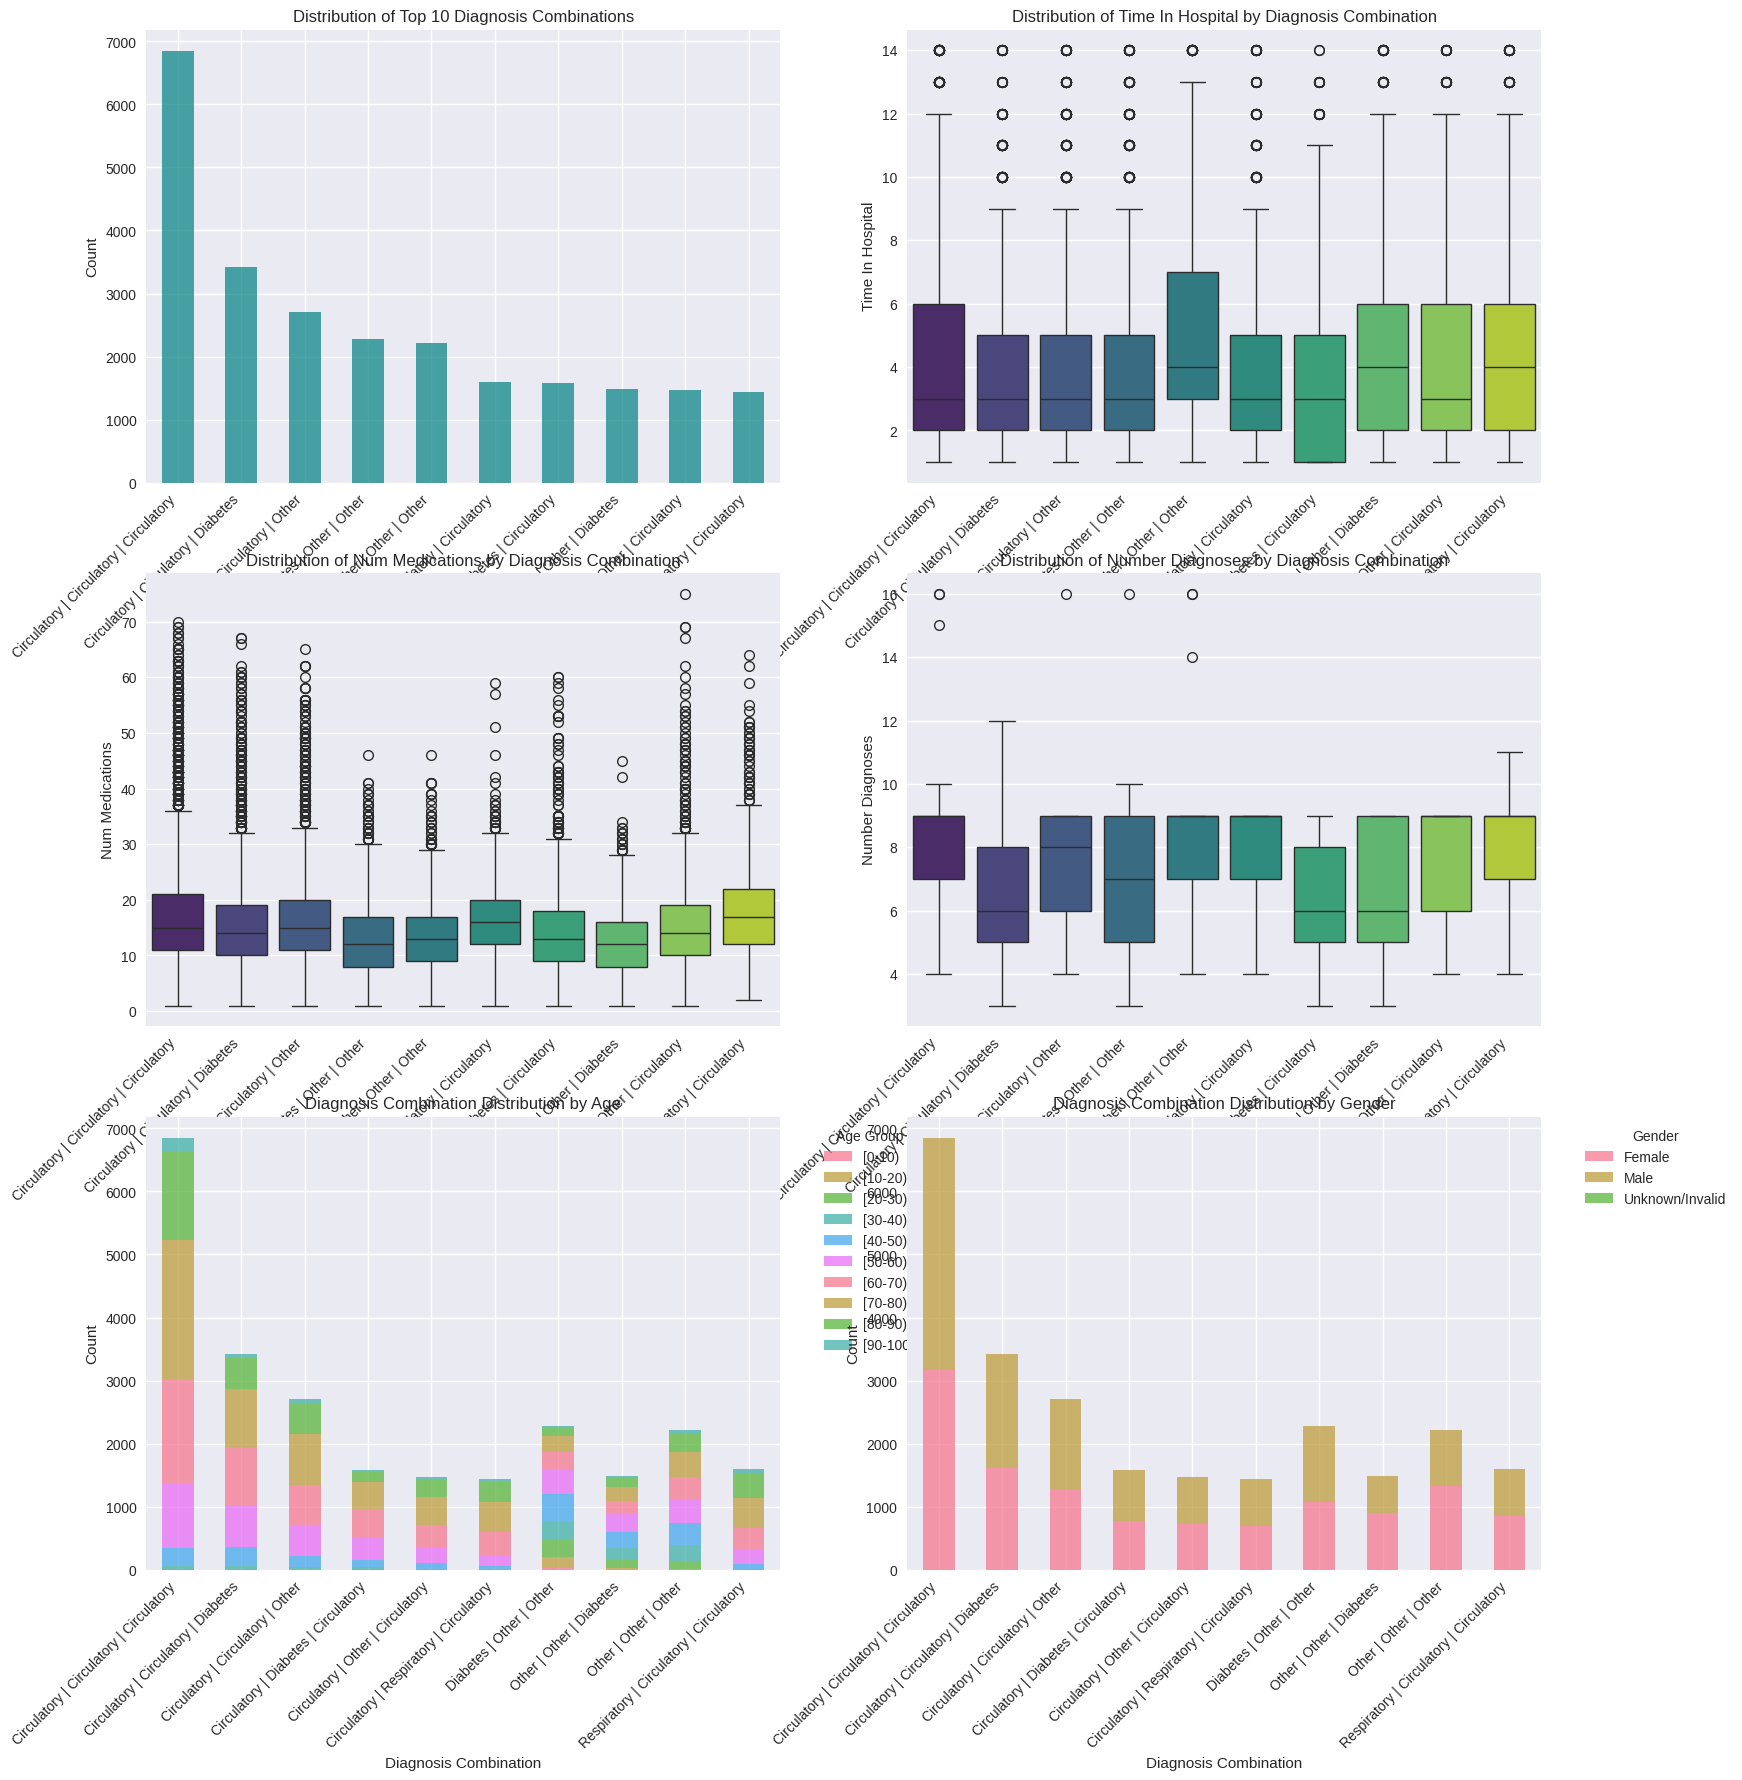

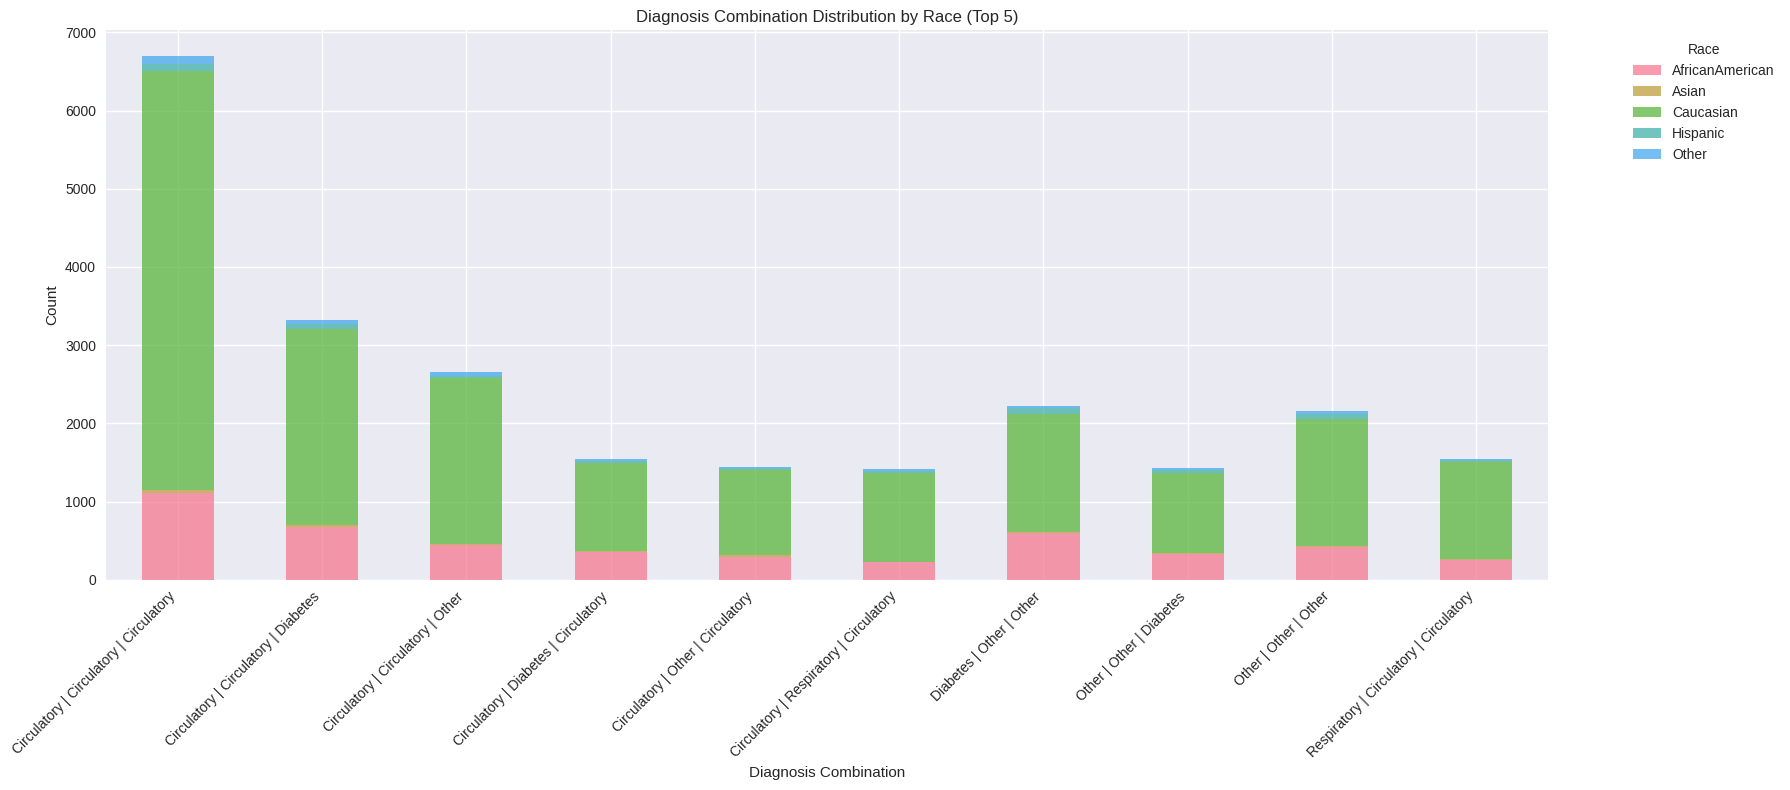

In [38]:
# Combine diagnosis groups into combinations
df['diag_combination'] = df['diag_1_group'].astype(str) + ' | ' + df['diag_2_group'].astype(str) + ' | ' + df['diag_3_group'].astype(str)

# Remove combinations with 'Unknown' or 'nan' values
df_cleaned_combinations = df[
    (~df['diag_1_group'].isin(['Unknown', 'nan'])) &
    (~df['diag_2_group'].isin(['Unknown', 'nan'])) &
    (~df['diag_3_group'].isin(['Unknown', 'nan']))
].copy()

# Get the top N combinations for analysis
top_n_combinations = df_cleaned_combinations['diag_combination'].value_counts().head(10).index.tolist()
df_top_combinations = df_cleaned_combinations[df_cleaned_combinations['diag_combination'].isin(top_n_combinations)].copy()

print(f"Top 10 Diagnosis Combinations:")
for combo, count in df_top_combinations['diag_combination'].value_counts().items():
    print(f"- {combo}: {count:,}")

# Plotting distributions by top diagnosis combinations
diag_metrics = ['time_in_hospital', 'num_medications', 'number_diagnoses']

plt.figure(figsize=(18, 20))

# Distribution of Count for Top Combinations
plt.subplot(3, 2, 1)
df_top_combinations['diag_combination'].value_counts().plot(kind='bar', color='teal', alpha=0.7)
plt.title('Distribution of Top 10 Diagnosis Combinations')
plt.xlabel('Diagnosis Combination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Plot distributions of numerical metrics by diagnosis combination
for i, metric in enumerate(diag_metrics):
    plt.subplot(3, 2, i + 2)
    if metric in df_top_combinations.columns and 'diag_combination' in df_top_combinations.columns:
        # Use boxplot to show distribution and outliers
        sns.boxplot(x='diag_combination', y=metric, data=df_top_combinations, palette='viridis', order=top_n_combinations)
        plt.title(f'Distribution of {metric.replace("_", " ").title()} by Diagnosis Combination')
        plt.xlabel('Diagnosis Combination')
        plt.ylabel(metric.replace("_", " ").title())
        plt.xticks(rotation=45, ha='right')


# Add plots broken down by age, race, and gender for top combinations

# Break down by Age
if 'age' in df_top_combinations.columns:
    plt.subplot(3, 2, 5)
    age_combination_counts = df_top_combinations.groupby('diag_combination')['age'].value_counts().unstack().fillna(0)
    age_combination_counts.plot(kind='bar', stacked=True, ax=plt.gca(), alpha=0.7)
    plt.title('Diagnosis Combination Distribution by Age')
    plt.xlabel('Diagnosis Combination')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Break down by Gender
if 'gender' in df_top_combinations.columns:
    plt.subplot(3, 2, 6)
    gender_combination_counts = df_top_combinations.groupby('diag_combination')['gender'].value_counts().unstack().fillna(0)
    gender_combination_counts.plot(kind='bar', stacked=True, ax=plt.gca(), alpha=0.7)
    plt.title('Diagnosis Combination Distribution by Gender')
    plt.xlabel('Diagnosis Combination')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Break down by Race (Top 5 races)
if 'race' in df_top_combinations.columns:
    plt.figure(figsize=(18, 8))
    top_races_in_combinations = df_top_combinations['race'].value_counts().head(5).index.tolist()
    df_top_combinations_race = df_top_combinations[df_top_combinations['race'].isin(top_races_in_combinations)].copy()
    race_combination_counts = df_top_combinations_race.groupby('diag_combination')['race'].value_counts().unstack().fillna(0)
    race_combination_counts.plot(kind='bar', stacked=True, ax=plt.gca(), alpha=0.7)
    plt.title('Diagnosis Combination Distribution by Race (Top 5)')
    plt.xlabel('Diagnosis Combination')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

# 7. CORRELATION ANALYSIS

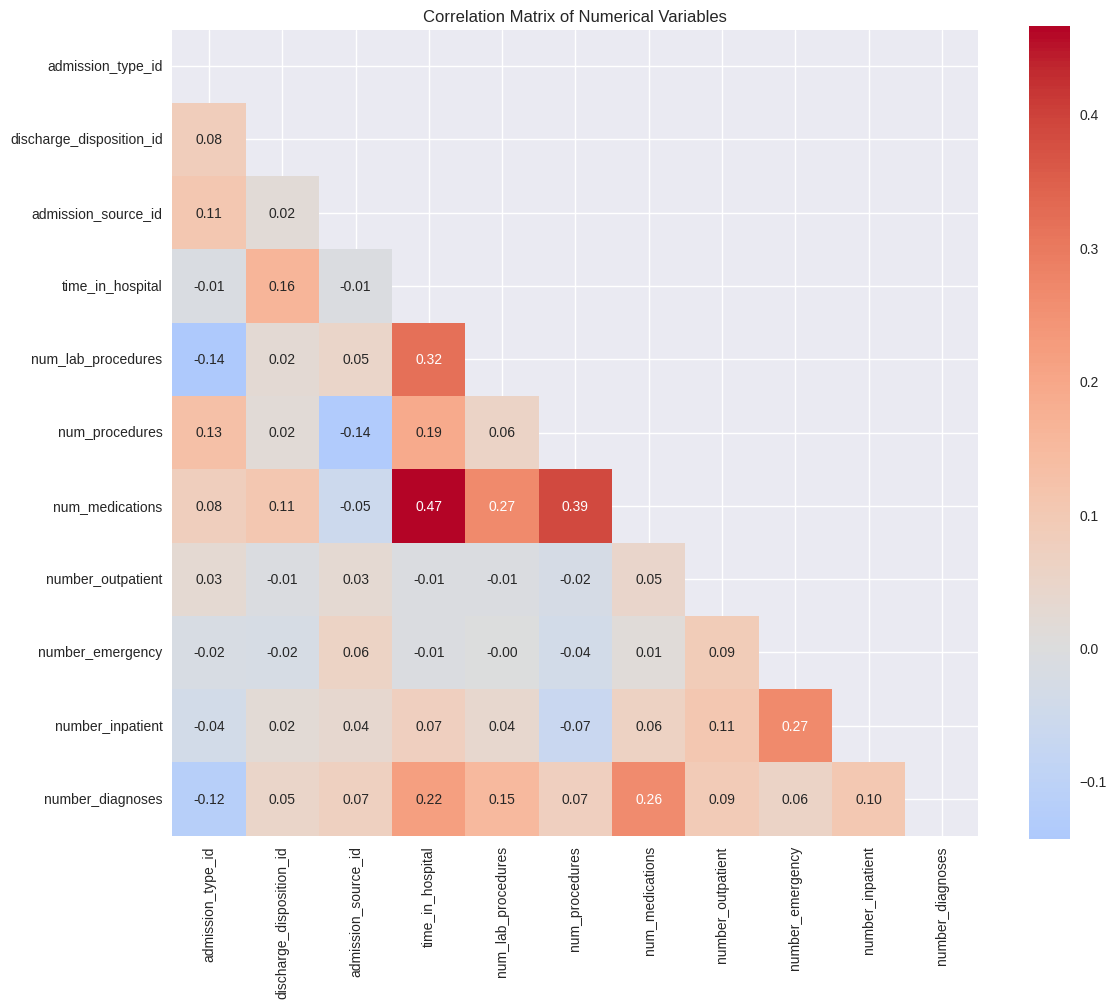

Highly correlated pairs (|correlation| > 0.5):


In [23]:
# Select numerical columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
if len(numeric_df.columns) > 1:
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()

    # Find highly correlated pairs
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:  # High correlation threshold
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))

    print("Highly correlated pairs (|correlation| > 0.5):")
    for col1, col2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  {col1} - {col2}: {corr:.3f}")

# 8. READMISSION PATTERN ANALYSIS

8.1 Readmission Rate by Age Group (%):
readmitted    <30    >30     NO
age                            
[0-10)       1.86  16.15  81.99
[10-20)      5.79  32.42  61.79
[20-30)     14.24  30.78  54.98
[30-40)     11.23  31.44  57.32
[40-50)     10.60  33.85  55.55
[50-60)      9.67  34.29  56.04
[60-70)     11.13  35.12  53.75
[70-80)     11.77  36.35  51.88
[80-90)     12.08  36.19  51.73
[90-100)    11.10  28.93  59.97


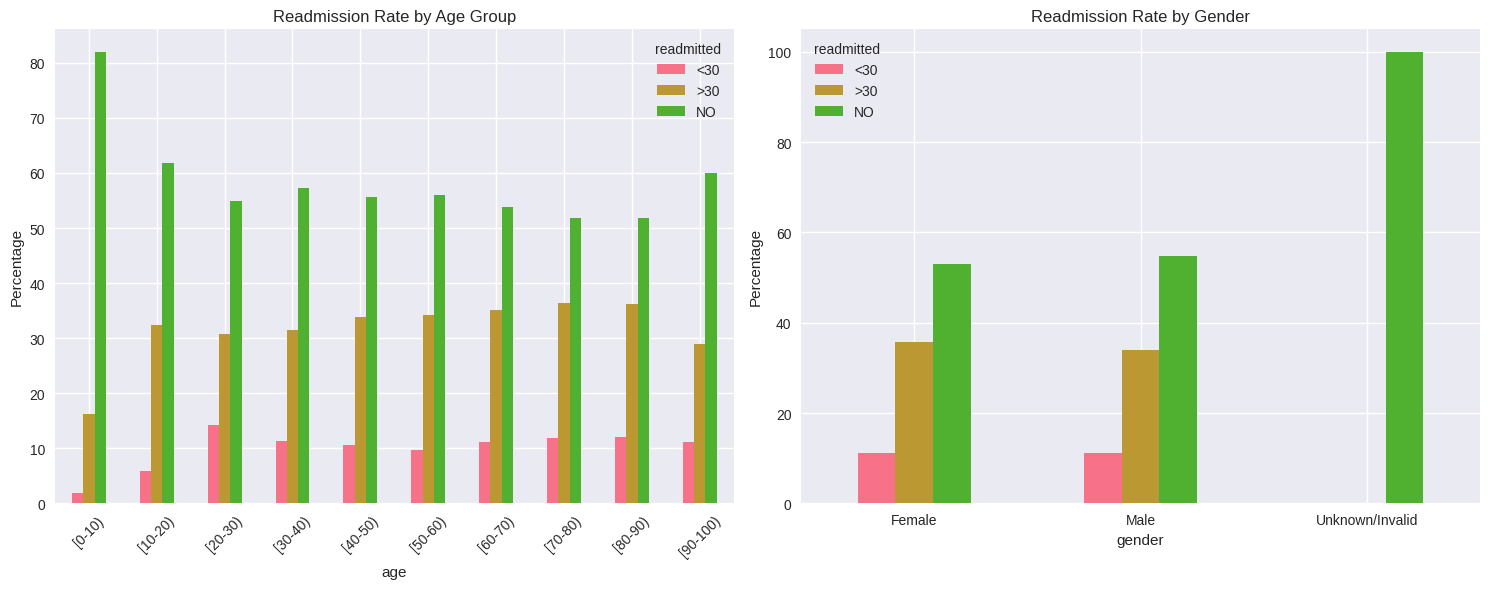

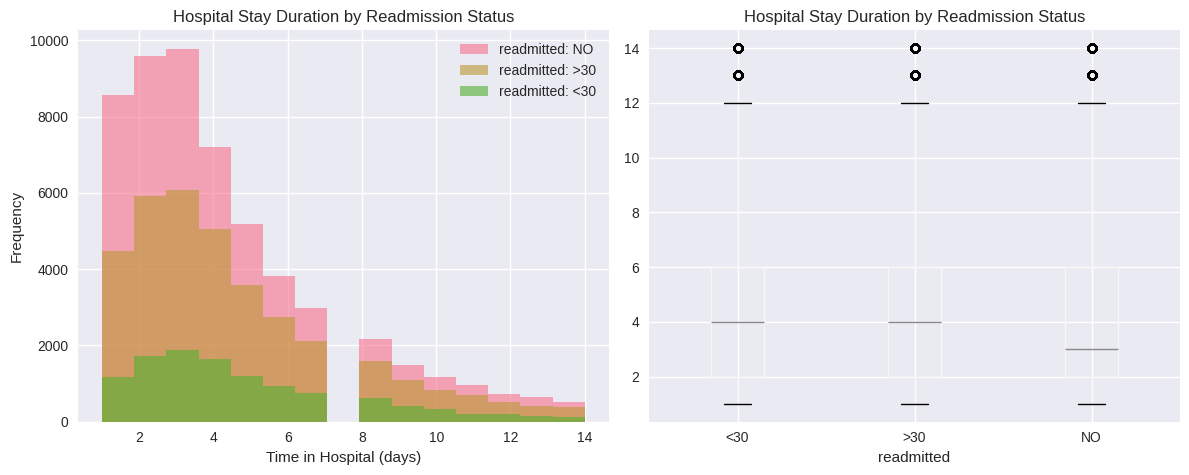

In [24]:
if target_col in df.columns:
    # 8.1 Readmission by Age Group
    if 'age' in df.columns:
        age_readmission = pd.crosstab(df['age'], df[target_col], normalize='index') * 100
        print("8.1 Readmission Rate by Age Group (%):")
        print(age_readmission.round(2))

        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        age_readmission.plot(kind='bar', stacked=False, ax=plt.gca())
        plt.title('Readmission Rate by Age Group')
        plt.xticks(rotation=45)
        plt.ylabel('Percentage')
        plt.legend(title=target_col)

    # 8.2 Readmission by Gender
    if 'gender' in df.columns:
        plt.subplot(1, 2, 2)
        gender_readmission = pd.crosstab(df['gender'], df[target_col], normalize='index') * 100
        gender_readmission.plot(kind='bar', ax=plt.gca())
        plt.title('Readmission Rate by Gender')
        plt.xticks(rotation=0)
        plt.ylabel('Percentage')
        plt.legend(title=target_col)

    plt.tight_layout()
    plt.show()

    # 8.3 Readmission by Hospital Stay Duration
    if 'time_in_hospital' in df.columns:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        for readmit_status in df[target_col].unique():
            subset = df[df[target_col] == readmit_status]['time_in_hospital']
            plt.hist(subset, alpha=0.6, label=f'{target_col}: {readmit_status}', bins=15)
        plt.xlabel('Time in Hospital (days)')
        plt.ylabel('Frequency')
        plt.title('Hospital Stay Duration by Readmission Status')
        plt.legend()

        # Box plot
        plt.subplot(1, 2, 2)
        df.boxplot(column='time_in_hospital', by=target_col, ax=plt.gca())
        plt.title('Hospital Stay Duration by Readmission Status')
        plt.suptitle('')  # Remove default title

        plt.tight_layout()
        plt.show()


In [35]:
# READMISSION ANALYSIS BY DIAGNOSIS
target_col = 'readmitted' if 'readmitted' in df.columns else df.columns[-1]
print(f"Only include <30 in readmitted")
if target_col in df.columns and 'diag_1_group' in df.columns:
    overall_readmit_rate = (df[target_col] == '<30').mean() * 100
    print(f"Overall readmission rate: {overall_readmit_rate:.2f}%")

    print(f"\nReadmission rates by primary diagnosis:")
    for diag_group in df['diag_1_group'].value_counts().head(8).index:
        if pd.notna(diag_group) and diag_group != 'Unknown':
            subset = df[df['diag_1_group'] == diag_group]
            diag_readmit_rate = (subset[target_col] == '<30').mean() * 100
            patient_count = len(subset)
            risk_ratio = diag_readmit_rate / overall_readmit_rate if overall_readmit_rate > 0 else 1

            risk_indicator = "🔴" if risk_ratio > 1.2 else "🟡" if risk_ratio > 0.8 else "🟢"
            print(f"{risk_indicator} {diag_group}: {diag_readmit_rate:.1f}% ({patient_count:,} patients, {risk_ratio:.2f}x)")

    print(f"\nReadmission rates by secondary diagnosis:")
    for diag_group in df['diag_2_group'].value_counts().head(8).index:
        if pd.notna(diag_group) and diag_group != 'Unknown':
            subset = df[df['diag_2_group'] == diag_group]
            diag_readmit_rate = (subset[target_col] == '<30').mean() * 100
            patient_count = len(subset)
            risk_ratio = diag_readmit_rate / overall_readmit_rate if overall_readmit_rate > 0 else 1

            risk_indicator = "🔴" if risk_ratio > 1.2 else "🟡" if risk_ratio > 0.8 else "🟢"
            print(f"{risk_indicator} {diag_group}: {diag_readmit_rate:.1f}% ({patient_count:,} patients, {risk_ratio:.2f}x)")



Only include <30 in readmitted
Overall readmission rate: 11.16%

Readmission rates by primary diagnosis:
🟡 Circulatory: 11.4% (30,437 patients, 1.03x)
🟡 Other: 11.5% (18,172 patients, 1.03x)
🟡 Respiratory: 9.7% (14,423 patients, 0.87x)
🟡 Digestive: 10.7% (9,475 patients, 0.96x)
🟡 Diabetes: 13.0% (8,757 patients, 1.16x)
🟡 Injury: 12.2% (6,974 patients, 1.10x)
🟡 Genitourinary: 10.8% (5,117 patients, 0.97x)
🟡 Musculoskeletal: 9.5% (4,957 patients, 0.85x)

Readmission rates by secondary diagnosis:
🟡 Circulatory: 11.1% (31,881 patients, 0.99x)
🟡 Other: 11.3% (26,553 patients, 1.01x)
🟡 Diabetes: 10.6% (12,794 patients, 0.95x)
🟡 Respiratory: 10.5% (10,895 patients, 0.94x)
🟡 Genitourinary: 11.8% (8,376 patients, 1.05x)
🟡 Digestive: 11.5% (4,170 patients, 1.03x)
🔴 Neoplasms: 14.9% (2,547 patients, 1.34x)
🟡 Injury: 11.4% (2,428 patients, 1.03x)


# 9. MEDICATION ANALYSIS

9.1 Diabetes Medication Usage:


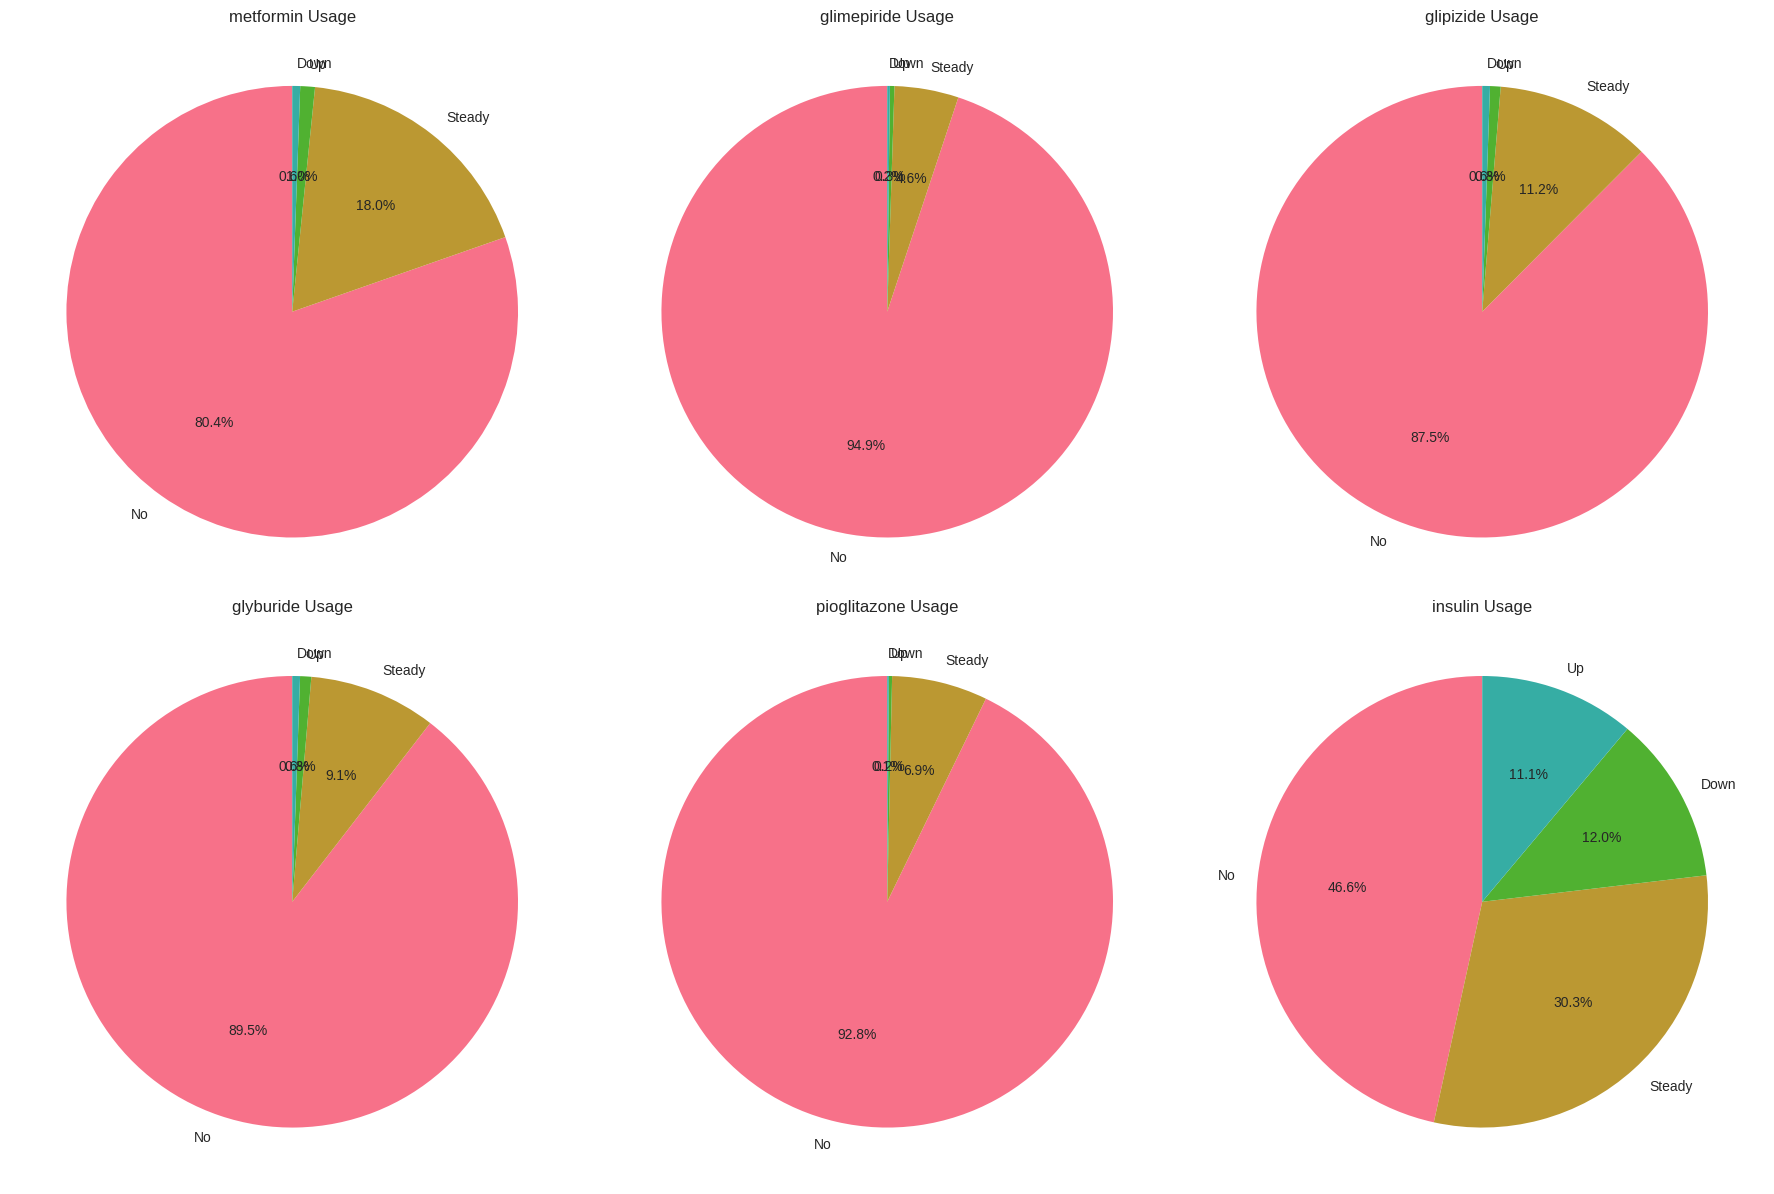


metformin distribution:
metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

glimepiride distribution:
glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: count, dtype: int64

glipizide distribution:
glipizide
No        89080
Steady    11356
Up          770
Down        560
Name: count, dtype: int64

glyburide distribution:
glyburide
No        91116
Steady     9274
Up          812
Down        564
Name: count, dtype: int64

pioglitazone distribution:
pioglitazone
No        94438
Steady     6976
Up          234
Down        118
Name: count, dtype: int64


In [26]:
# Find medication columns
med_cols = [col for col in df.columns if any(med in col.lower() for med in
           ['insulin', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone'])]

if med_cols:
    print(f"9.1 Diabetes Medication Usage:")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, med_col in enumerate(med_cols[:6]):  # Show first 6 medications
        if i < len(axes):
            med_counts = df[med_col].value_counts()
            axes[i].pie(med_counts.values, labels=med_counts.index, autopct='%1.1f%%', startangle=90)
            axes[i].set_title(f'{med_col} Usage')

    # Hide unused subplots
    for j in range(len(med_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Medication usage statistics
    for med_col in med_cols[:5]:  # Show first 5
        print(f"\n{med_col} distribution:")
        print(df[med_col].value_counts())

# 10. OUTLIER DETECTION

numerical_cols: ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

admission_type_id outliers:
  Lower bound: -2.00
  Upper bound: 6.00
  Number of outliers: 341 (0.34%)

discharge_disposition_id outliers:
  Lower bound: -3.50
  Upper bound: 8.50
  Number of outliers: 9818 (9.65%)

admission_source_id outliers:
  Lower bound: -8.00
  Upper bound: 16.00
  Number of outliers: 6956 (6.84%)

time_in_hospital outliers:
  Lower bound: -4.00
  Upper bound: 12.00
  Number of outliers: 2252 (2.21%)

num_lab_procedures outliers:
  Lower bound: -8.00
  Upper bound: 96.00
  Number of outliers: 143 (0.14%)

num_procedures outliers:
  Lower bound: -3.00
  Upper bound: 5.00
  Number of outliers: 4954 (4.87%)

num_medications outliers:
  Lower bound: -5.00
  Upper bound: 35.00
  Number of outliers: 2557 (2.51%)

number_ou

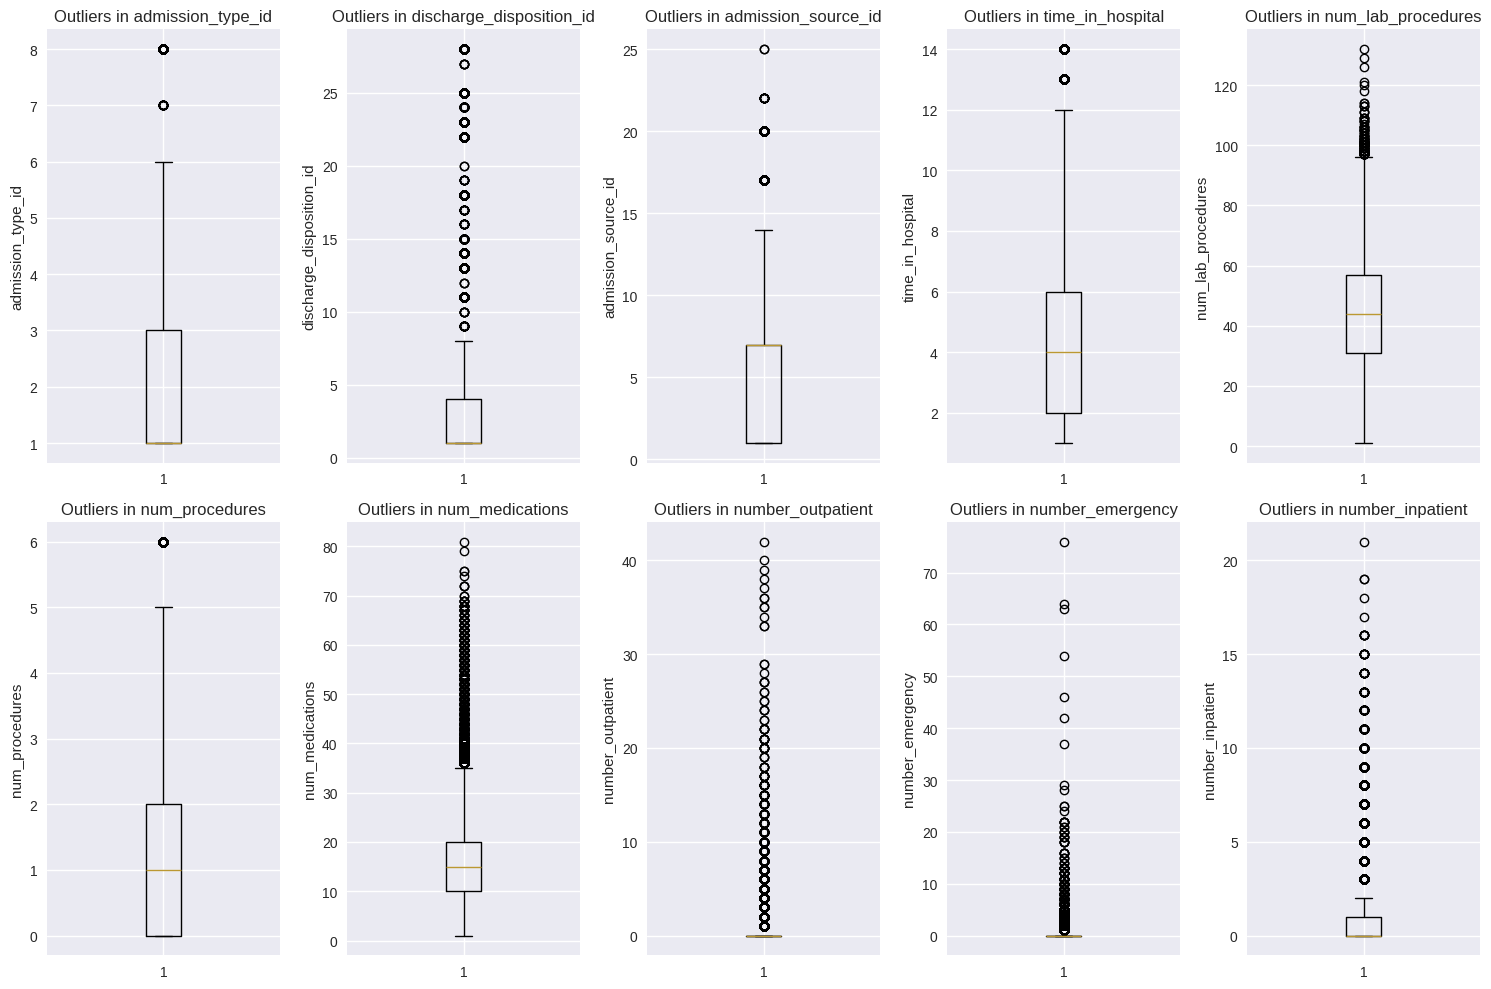

In [27]:
# Focus on key numerical variables for outlier detection
key_numeric_cols = []
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'numerical_cols: {numerical_cols}')
for col in ['time_in_hospital', 'num_medications', 'number_diagnoses', 'num_lab_procedures']:
    if col in df.columns:
        key_numeric_cols.append(col)

if numerical_cols:
    fig, axes = plt.subplots(2, len(numerical_cols)//2, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            # Box plot for outlier visualization
            axes[i].boxplot(df[col].dropna())
            axes[i].set_title(f'Outliers in {col}')
            axes[i].set_ylabel(col)

            # Calculate outlier statistics
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"\n{col} outliers:")
            print(f"  Lower bound: {lower_bound:.2f}")
            print(f"  Upper bound: {upper_bound:.2f}")
            print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

    plt.tight_layout()
    plt.show()

# 11. HOSPITAL ADMISSION PATTERNS

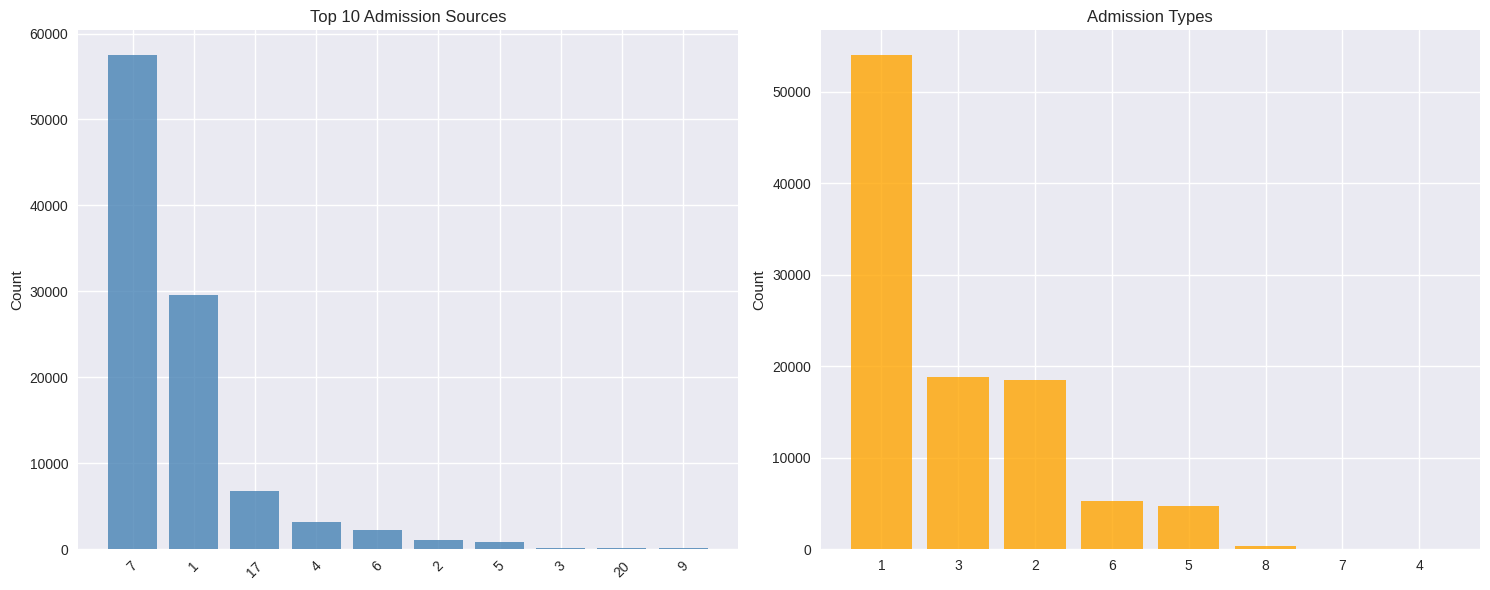

In [28]:
# Admission source and type analysis
if 'admission_source_id' in df.columns and 'admission_type_id' in df.columns:
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    admission_source_counts = df['admission_source_id'].value_counts().head(10)
    plt.bar(range(len(admission_source_counts)), admission_source_counts.values,
            color='steelblue', alpha=0.8)
    plt.xticks(range(len(admission_source_counts)), admission_source_counts.index, rotation=45)
    plt.title('Top 10 Admission Sources')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    admission_type_counts = df['admission_type_id'].value_counts()
    plt.bar(range(len(admission_type_counts)), admission_type_counts.values,
            color='orange', alpha=0.8)
    plt.xticks(range(len(admission_type_counts)), admission_type_counts.index)
    plt.title('Admission Types')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# 12. DIAGNOSTIC ANALYSIS

12.1 Most Common Primary Diagnoses:
diag_1
428      6862
414      6581
786      4016
410      3614
486      3508
427      2766
491      2275
715      2151
682      2042
434      2028
780      2019
996      1967
276      1889
38       1688
250.8    1680
Name: count, dtype: int64
12.2 Most Common Secondary Diagnoses:
diag_2
276       6752
428       6662
250       6071
427       5036
401       3736
496       3305
599       3288
403       2823
414       2650
411       2566
250.02    2074
707       1999
585       1871
584       1649
491       1545
Name: count, dtype: int64
12.3 Most Common Additional Diagnoses:
diag_3
250       11555
401        8289
276        5175
428        4577
427        3955
414        3664
496        2605
403        2357
585        1992
272        1969
599        1941
V45        1389
250.02     1369
707        1360
780        1334
Name: count, dtype: int64


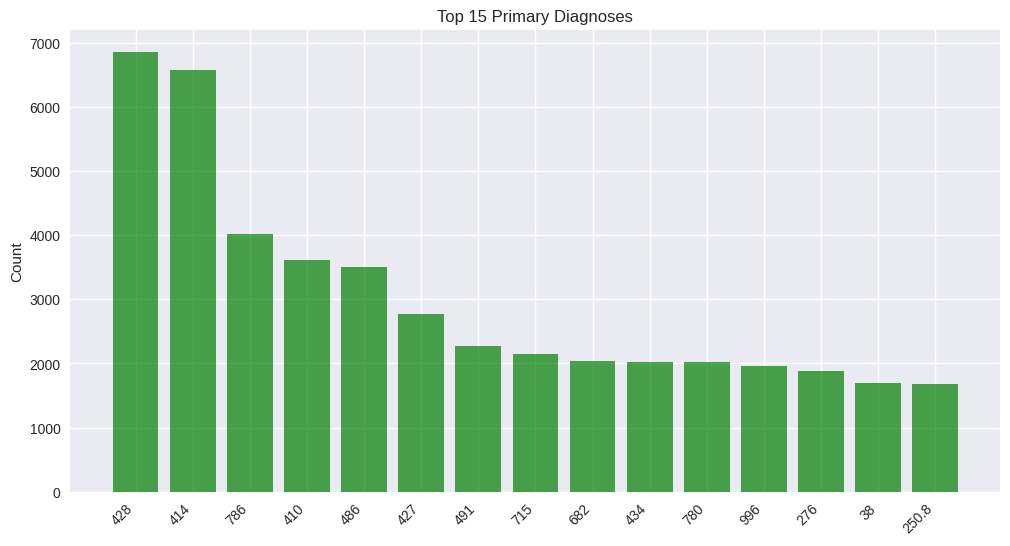

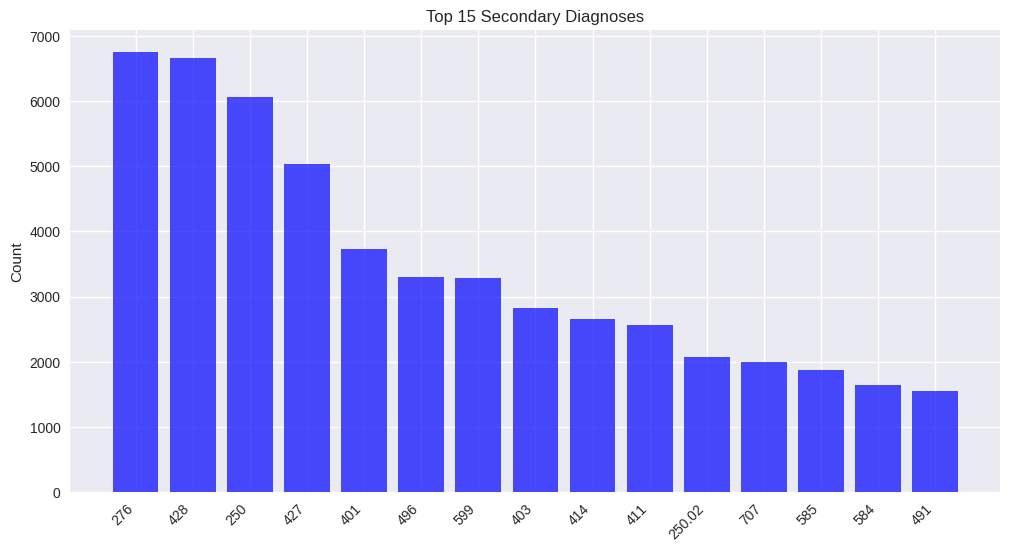

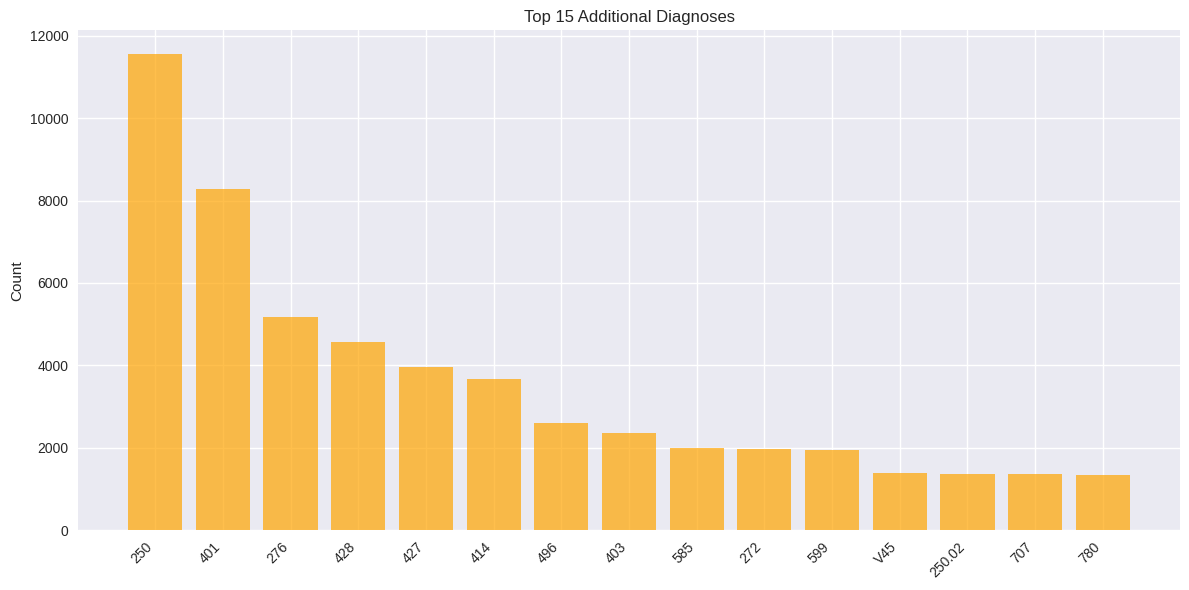

In [29]:
# Primary, secondary, and additional diagnoses
diag_cols = ['diag_1', 'diag_2', 'diag_3']
available_diag_cols = [col for col in diag_cols if col in df.columns]

if available_diag_cols:
    print("12.1 Most Common Primary Diagnoses:")
    if 'diag_1' in df.columns:
        primary_diag = df['diag_1'].value_counts().head(15)
        print(primary_diag)

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(primary_diag)), primary_diag.values, color='green', alpha=0.7)
        plt.xticks(range(len(primary_diag)), primary_diag.index, rotation=45, ha='right')
        plt.title('Top 15 Primary Diagnoses')
        plt.ylabel('Count')

    print("12.2 Most Common Secondary Diagnoses:")
    if 'diag_2' in df.columns:
        primary_diag = df['diag_2'].value_counts().head(15)
        print(primary_diag)

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(primary_diag)), primary_diag.values, color='blue', alpha=0.7)
        plt.xticks(range(len(primary_diag)), primary_diag.index, rotation=45, ha='right')
        plt.title('Top 15 Secondary Diagnoses')
        plt.ylabel('Count')

    print("12.3 Most Common Additional Diagnoses:")
    if 'diag_3' in df.columns:
        primary_diag = df['diag_3'].value_counts().head(15)
        print(primary_diag)

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(primary_diag)), primary_diag.values, color='orange', alpha=0.7)
        plt.xticks(range(len(primary_diag)), primary_diag.index, rotation=45, ha='right')
        plt.title('Top 15 Additional Diagnoses')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


# 13. SUMMARY REPORT

In [30]:
print("\n📊 DATASET OVERVIEW:")
print(f"• Total patients: {len(df):,}")
print(f"• Total features: {len(df.columns)}")
print(f"• Numerical features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"• Categorical features: {len(df.select_dtypes(include=['object']).columns)}")
print(f"• Missing data: {df.isnull().sum().sum():,} values ({df.isnull().sum().sum()/(len(df)*len(df.columns))*100:.2f}%)")
print(f"• High missing data columns: {missing_cols[missing_cols['Missing Percentage'] > 90]}")
print(f"• Constant data columns: {constant_cols}")

print("\n🏥 KEY FINDINGS:")

# Patient demographics
if 'age' in df.columns:
    most_common_age = df['age'].mode()[0] if not df['age'].empty else "N/A"
    print(f"• Most common age group: {most_common_age}")

if 'gender' in df.columns:
    gender_dist = df['gender'].value_counts()
    if len(gender_dist) > 0:
        dominant_gender = gender_dist.index[0]
        gender_pct = gender_dist.iloc[0] / len(df) * 100
        print(f"• Gender distribution: {dominant_gender} ({gender_pct:.1f}%)")

if 'race' in df.columns:
    most_common_race = df['race'].mode()[0] if not df['race'].empty else "N/A"
    print(f"""• Most common race: {most_common_race}.
    Underrepresented for Asian (0.6%) and Hispanic (2%) as racial and ethnic groups in the U.S. for 2022:
      White (Non-Hispanic): 59.2%
      Hispanic or Latino: 19.1%
      Black or African American: Approximately 12%
      Asian (Non-Hispanic): Approximately 5.75%""")

# Medical characteristics
if 'time_in_hospital' in df.columns:
    avg_stay = df['time_in_hospital'].mean()
    print(f"• Average hospital stay: {avg_stay:.1f} days")

if 'num_medications' in df.columns:
    avg_medications = df['num_medications'].mean()
    print(f"• Average medications per patient: {avg_medications:.1f}")

if 'number_diagnoses' in df.columns:
    avg_diagnoses = df['number_diagnoses'].mean()
    print(f"• Average diagnoses per patient: {avg_diagnoses:.1f}")

# Readmission insights
if target_col in df.columns:
    readmit_rate = df[target_col].value_counts(normalize=True) * 100
    print(f"\n🔄 READMISSION ANALYSIS:")
    for status, rate in readmit_rate.items():
        print(f"• {status}: {rate:.1f}% of patients")
    print(f"Dataset is imbalanced for <30 days readmission rate")

# Medication insights

print("\n💊 MEDICATION INSIGHTS:")
if med_cols:
    for med_col in med_cols[:3]:  # Top 3 medications
        if med_col in df.columns:
            med_usage = df[med_col].value_counts()
            if 'Up' in med_usage.index:
                up_pct = med_usage['Up'] / len(df) * 100
                print(f"• {med_col} increased: {up_pct:.1f}% of patients")

print("\n🚨 DATA QUALITY NOTES:")
if question_mark_counts:
    print("• Missing data patterns identified in categorical variables")
    print("• '?' values replaced with NaN for proper handling")

if high_corr_pairs:
    print(f"• {len(high_corr_pairs)} highly correlated variable pairs found")
else:
    print("• No highly correlated variable pairs found")


📊 DATASET OVERVIEW:
• Total patients: 101,766
• Total features: 51
• Numerical features: 11
• Categorical features: 37
• Missing data: 375,819 values (7.24%)
• High missing data columns:                Missing Count  Missing Percentage
weight                 98569           96.858479
max_glu_serum          96420           94.746772
• Constant data columns: ['examide', 'citoglipton']

🏥 KEY FINDINGS:
• Most common age group: [70-80)
• Gender distribution: Female (53.8%)
• Most common race: Caucasian. 
    Underrepresented for Asian (0.6%) and Hispanic (2%) as racial and ethnic groups in the U.S. for 2022: 
      White (Non-Hispanic): 59.2%
      Hispanic or Latino: 19.1%
      Black or African American: Approximately 12%
      Asian (Non-Hispanic): Approximately 5.75%
• Average hospital stay: 4.4 days
• Average medications per patient: 16.0
• Average diagnoses per patient: 7.4

🔄 READMISSION ANALYSIS:
• NO: 53.9% of patients
• >30: 34.9% of patients
• <30: 11.2% of patients
Dataset is 